In [333]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.linear_model import RidgeCV, LinearRegression, LassoCV
from scipy.stats import skew
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
from IPython.display import display, HTML
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
############################## drop ID column #######################
ID = test['Id']
test.drop('Id', axis = 1, inplace = True)
train.drop('Id', axis = 1, inplace = True)

#####################################all_data##########################
all_data = pd.concat((train, test)).reset_index(drop = True)

# Any results you write to the current directory are saved as output.

In [334]:
print(train.shape)
train.head(n=300
          )

(1460, 80)


MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0            60       RL         65.0     8450   Pave   NaN      Reg   
1            20       RL         80.0     9600   Pave   NaN      Reg   
2            60       RL         68.0    11250   Pave   NaN      IR1   
3            70       RL         60.0     9550   Pave   NaN      IR1   
4            60       RL         84.0    14260   Pave   NaN      IR1   
5            50       RL         85.0    14115   Pave   NaN      IR1   
6            20       RL         75.0    10084   Pave   NaN      Reg   
7            60       RL          NaN    10382   Pave   NaN      IR1   
8            50       RM         51.0     6120   Pave   NaN      Reg   
9           190       RL         50.0     7420   Pave   NaN      Reg   
10           20       RL         70.0    11200   Pave   NaN      Reg   
11           60       RL         85.0    11924   Pave   NaN      IR1   
12           20       RL          NaN    12968   Pave   NaN      IR2   
13           20       RL         91.0    10652   Pave   NaN      IR1   
14           20       RL          NaN    10920   Pave   NaN      IR1   
15           45       RM         51.0     6120   Pave   NaN      Reg   
16           20       RL          NaN    11241   Pave   NaN      IR1   
17           90       RL         72.0    10791   Pave   NaN      Reg   
18           20       RL         66.0    13695   Pave   NaN      Reg   
19           20       RL         70.0     7560   Pave   NaN      Reg   
20           60       RL        101.0    14215   Pave   NaN      IR1   
21           45       RM         57.0     7449   Pave  Grvl      Reg   
22           20       RL         75.0     9742   Pave   NaN      Reg   
23          120       RM         44.0     4224   Pave   NaN      Reg   
24           20       RL          NaN     8246   Pave   NaN      IR1   
25           20       RL        110.0    14230   Pave   NaN      Reg   
26           20       RL         60.0     7200   Pave   NaN      Reg   
27           20       RL         98.0    11478   Pave   NaN      Reg   
28           20       RL         47.0    16321   Pave   NaN      IR1   
29           30       RM         60.0     6324   Pave   NaN      IR1   
30           70  C (all)         50.0     8500   Pave  Pave      Reg   
31           20       RL          NaN     8544   Pave   NaN      IR1   
32           20       RL         85.0    11049   Pave   NaN      Reg   
33           20       RL         70.0    10552   Pave   NaN      IR1   
34          120       RL         60.0     7313   Pave   NaN      Reg   
35           60       RL        108.0    13418   Pave   NaN      Reg   
36           20       RL        112.0    10859   Pave   NaN      Reg   
37           20       RL         74.0     8532   Pave   NaN      Reg   
38           20       RL         68.0     7922   Pave   NaN      Reg   
39           90       RL         65.0     6040   Pave   NaN      Reg   
40           20       RL         84.0     8658   Pave   NaN      Reg   
41           20       RL        115.0    16905   Pave   NaN      Reg   
42           85       RL          NaN     9180   Pave   NaN      IR1   
43           20       RL          NaN     9200   Pave   NaN      IR1   
44           20       RL         70.0     7945   Pave   NaN      Reg   
45          120       RL         61.0     7658   Pave   NaN      Reg   
46           50       RL         48.0    12822   Pave   NaN      IR1   
47           20       FV         84.0    11096   Pave   NaN      Reg   
48          190       RM         33.0     4456   Pave   NaN      Reg   
49           20       RL         66.0     7742   Pave   NaN      Reg   
50           60       RL          NaN    13869   Pave   NaN      IR2   
51           50       RM         52.0     6240   Pave   NaN      Reg   
52           90       RM        110.0     8472   Grvl   NaN      IR2   
53           20       RL         68.0    50271   Pave   NaN      IR1   
54           80       RL         60.0     713

In [335]:
# train['MasVnrType'][train['MasVnrArea'].isnull()]
# train['GarageYrBlt'][train['GarageYrBlt'].isnull()]
print(train[['GarageYrBlt','GarageArea']][(train['GarageYrBlt'].isnull())])
# train.index[train['GarageYrBlt'].isnull()]
# train['GarageArea'].isnull().any()

      GarageYrBlt  GarageArea
39            NaN           0
48            NaN           0
78            NaN           0
88            NaN           0
89            NaN           0
99            NaN           0
108           NaN           0
125           NaN           0
127           NaN           0
140           NaN           0
148           NaN           0
155           NaN           0
163           NaN           0
165           NaN           0
198           NaN           0
210           NaN           0
241           NaN           0
250           NaN           0
287           NaN           0
291           NaN           0
307           NaN           0
375           NaN           0
386           NaN           0
393           NaN           0
431           NaN           0
434           NaN           0
441           NaN           0
464           NaN           0
495           NaN           0
520           NaN           0
528           NaN           0
533           NaN           0
535       

In [336]:
print(test.shape)
test.head()

(1459, 79)


MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0          20       RH         80.0    11622   Pave   NaN      Reg   
1          20       RL         81.0    14267   Pave   NaN      IR1   
2          60       RL         74.0    13830   Pave   NaN      IR1   
3          60       RL         78.0     9978   Pave   NaN      IR1   
4         120       RL         43.0     5005   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl        NAmes      Feedr   
1         Lvl    AllPub    Corner       Gtl        NAmes       Norm   
2         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
3         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
4         HLS    AllPub    Inside       Gtl      StoneBr       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     1Story            5            6       1961   
1       Norm     1Fam     1Story            6            6       1958   
2       Norm     1Fam     2Story            5            5       1997   
3       Norm     1Fam     2Story            6            6       1998   
4       Norm   TwnhsE     1Story            8            5       1992   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          1961     Gable  CompShg     VinylSd     VinylSd       None   
1          1958       Hip  CompShg     Wd Sdng     Wd Sdng    BrkFace   
2          1998     Gable  CompShg     VinylSd     VinylSd       None   
3          1998     Gable  CompShg     VinylSd     VinylSd    BrkFace   
4          1992     Gable  CompShg     HdBoard     HdBoard       None   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0         0.0        TA        TA     CBlock       TA       TA           No   
1       108.0        TA        TA     CBlock       TA       TA           No   
2         0.0        TA        TA      PConc       Gd       TA           No   
3        20.0        TA        TA      PConc       TA       TA           No   
4         0.0        Gd        TA      PConc       Gd       TA           No   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2      ...        LowQualFinSF  \
0          Rec       468.0          LwQ      ...                   0   
1          ALQ       923.0          Unf      ...                   0   
2          GLQ       791.0          Unf      ...                   0   
3          GLQ       602.0          Unf      ...                   0   
4          ALQ       263.0          Unf      ...                   0   

   GrLivArea  BsmtFullBath BsmtHalfBath FullBath HalfBath BedroomAbvGr  \
0        896           0.0          0.0        1        0            2   
1       1329           0.0          0.0        1        1            3   
2       1629           0.0          0.0        2        1            3   
3       1604           0.0          0.0        2        1            3   
4       1280           0.0          0.0        2        0            2   

   KitchenAbvGr  KitchenQual  TotRmsAbvGrd  Functional  Fireplaces  \
0             1           TA             5         Typ           0   
1             1           Gd             6         Typ           0   
2             1           TA             6         Typ           1   
3             1           Gd             7         Typ           1   
4             1           Gd             5         Typ           0   

   FireplaceQu  GarageType  GarageYrBlt  GarageFinish  GarageCars GarageArea  \
0          NaN      Attchd       1961.0           Unf         1.0      730.0   
1          NaN      Attchd       1958.0           Unf         1.0      312.0   
2           TA      Attchd       1997.0           Fin         2.0      482.0   
3           Gd      Attchd       1998.0           Fin         2.0      470.0   
4          NaN      Attchd       1992.0           RFn         2.0      506.0   

   GarageQual GarageCo

> ## Numerical Features

In [337]:
numeric_features = list(test.select_dtypes(exclude=["object",'category']).columns)
numeric_features_num = len(numeric_features)
print("no of numerical feature: ",numeric_features_num,"\nNumerical Features: ",
      numeric_features)

no of numerical feature:  36 
Numerical Features:  ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']


In [338]:
train.describe()

MSSubClass  LotFrontage        LotArea  OverallQual  OverallCond  \
count  1460.000000  1201.000000    1460.000000  1460.000000  1460.000000   
mean     56.897260    70.049958   10516.828082     6.099315     5.575342   
std      42.300571    24.284752    9981.264932     1.382997     1.112799   
min      20.000000    21.000000    1300.000000     1.000000     1.000000   
25%      20.000000    59.000000    7553.500000     5.000000     5.000000   
50%      50.000000    69.000000    9478.500000     6.000000     5.000000   
75%      70.000000    80.000000   11601.500000     7.000000     6.000000   
max     190.000000   313.000000  215245.000000    10.000000     9.000000   

         YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1   BsmtFinSF2  \
count  1460.000000   1460.000000  1452.000000  1460.000000  1460.000000   
mean   1971.267808   1984.865753   103.685262   443.639726    46.549315   
std      30.202904     20.645407   181.066207   456.098091   161.319273   
min    1872.000000   1950.000000     0.000000     0.000000     0.000000   
25%    1954.000000   1967.000000     0.000000     0.000000     0.000000   
50%    1973.000000   1994.000000     0.000000   383.500000     0.000000   
75%    2000.000000   2004.000000   166.000000   712.250000     0.000000   
max    2010.000000   2010.000000  1600.000000  5644.000000  1474.000000   

         BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  LowQualFinSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000   1460.000000   
mean    567.240411  1057.429452  1162.626712   346.992466      5.844521   
std     441.866955   438.705324   386.587738   436.528436     48.623081   
min       0.000000     0.000000   334.000000     0.000000      0.000000   
25%     223.000000   795.750000   882.000000     0.000000      0.000000   
50%     477.500000   991.500000  1087.000000     0.000000      0.000000   
75%     808.000000  1298.250000  1391.250000   728.000000      0.000000   
max    2336.000000  6110.000000  4692.000000  2065.000000    572.000000   

         GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath     HalfBath  \
count  1460.000000   1460.000000   1460.000000  1460.000000  1460.000000   
mean   1515.463699      0.425342      0.057534     1.565068     0.382877   
std     525.480383      0.518911      0.238753     0.550916     0.502885   
min     334.000000      0.000000      0.000000     0.000000     0.000000   
25%    1129.500000      0.000000      0.000000     1.000000     0.000000   
50%    1464.000000      0.000000      0.000000     2.000000     0.000000   
75%    1776.750000      1.000000      0.000000     2.000000     1.000000   
max    5642.000000      3.000000      2.000000     3.000000     2.000000   

       BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  GarageYrBlt  \
count   1460.000000   1460.000000   1460.000000  1460.000000  1379.000000   
mean       2.866438      1.046575      6.517808     0.613014  1978.506164   
std        0.815778      0.220338      1.625393     0.644666    24.689725   
min        0.000000      0.000000      2.000000     0.000000  1900.000000   
25%        2.000000      1.000000      5.000000     0.000000  1961.000000   
50%        3.000000      1.000000      6.000000     1.000000  1980.000000   
75%        3.000000      1.000000      7.000000     1.000000  2002.000000   
max        8.000000      3.000000     14.000000     3.000000  2010.000000   

        GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  EnclosedPorch  \
count  1460.000000  1460.000000  1460.000000  1460.000000    1460.000000   
mean      1.767123   472.980137    94.244521    46.660274      21.954110   
std       0.747315   213.804841   125.338794    66.256028      61.119149   
min       0.000000     0.000000     0.000000     0.000000       0.000000   
25%       1.000000   334.500000     0.000000     0.000000       0.000000   
50%       2.000000   480.000000     0.000000    25.000000       0.000000   
75%       2.000000   576.000000   168.000000    68.000000   

In [339]:
pd.options.display.max_columns = 45
test.describe()

MSSubClass  LotFrontage       LotArea  OverallQual  OverallCond  \
count  1459.000000  1232.000000   1459.000000  1459.000000  1459.000000   
mean     57.378341    68.580357   9819.161069     6.078821     5.553804   
std      42.746880    22.376841   4955.517327     1.436812     1.113740   
min      20.000000    21.000000   1470.000000     1.000000     1.000000   
25%      20.000000    58.000000   7391.000000     5.000000     5.000000   
50%      50.000000    67.000000   9399.000000     6.000000     5.000000   
75%      70.000000    80.000000  11517.500000     7.000000     6.000000   
max     190.000000   200.000000  56600.000000    10.000000     9.000000   

         YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1   BsmtFinSF2  \
count  1459.000000   1459.000000  1444.000000  1458.000000  1458.000000   
mean   1971.357779   1983.662783   100.709141   439.203704    52.619342   
std      30.390071     21.130467   177.625900   455.268042   176.753926   
min    1879.000000   1950.000000     0.000000     0.000000     0.000000   
25%    1953.000000   1963.000000     0.000000     0.000000     0.000000   
50%    1973.000000   1992.000000     0.000000   350.500000     0.000000   
75%    2001.000000   2004.000000   164.000000   753.500000     0.000000   
max    2010.000000   2010.000000  1290.000000  4010.000000  1526.000000   

         BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  LowQualFinSF  \
count  1458.000000  1458.000000  1459.000000  1459.000000   1459.000000   
mean    554.294925  1046.117970  1156.534613   325.967786      3.543523   
std     437.260486   442.898624   398.165820   420.610226     44.043251   
min       0.000000     0.000000   407.000000     0.000000      0.000000   
25%     219.250000   784.000000   873.500000     0.000000      0.000000   
50%     460.000000   988.000000  1079.000000     0.000000      0.000000   
75%     797.750000  1305.000000  1382.500000   676.000000      0.000000   
max    2140.000000  5095.000000  5095.000000  1862.000000   1064.000000   

         GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath     HalfBath  \
count  1459.000000   1457.000000   1457.000000  1459.000000  1459.000000   
mean   1486.045922      0.434454      0.065202     1.570939     0.377656   
std     485.566099      0.530648      0.252468     0.555190     0.503017   
min     407.000000      0.000000      0.000000     0.000000     0.000000   
25%    1117.500000      0.000000      0.000000     1.000000     0.000000   
50%    1432.000000      0.000000      0.000000     2.000000     0.000000   
75%    1721.000000      1.000000      0.000000     2.000000     1.000000   
max    5095.000000      3.000000      2.000000     4.000000     2.000000   

       BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageYrBlt  \
count   1459.000000   1459.000000   1459.000000  1459.00000  1381.000000   
mean       2.854010      1.042495      6.385195     0.58122  1977.721217   
std        0.829788      0.208472      1.508895     0.64742    26.431175   
min        0.000000      0.000000      3.000000     0.00000  1895.000000   
25%        2.000000      1.000000      5.000000     0.00000  1959.000000   
50%        3.000000      1.000000      6.000000     0.00000  1979.000000   
75%        3.000000      1.000000      7.000000     1.00000  2002.000000   
max        6.000000      2.000000     15.000000     4.00000  2207.000000   

        GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  EnclosedPorch  \
count  1458.000000  1458.000000  1459.000000  1459.000000    1459.000000   
mean      1.766118   472.768861    93.174777    48.313914      24.243317   
std       0.775945   217.048611   127.744882    68.883364      67.227765   
min       0.000000     0.000000     0.000000     0.000000       0.000000   
25%       1.000000   318.000000     0.000000     0.000000       0.000000   
50%       2.000000   480.000000     0.000000    28.000000       0.000000   
75%       2.000000   576.000000   168.000000    72.000000       0.000000   
ma

## Categorical Features

In [340]:
category_feature = list(test.select_dtypes(exclude=[np.number]).columns)
category_feature_num = len(category_feature)
print("no. of categorical feature: ",category_feature_num,"\nCategorical Features: ", category_feature)

no. of categorical feature:  43 
Categorical Features:  ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


In [341]:
train.describe(include = ['O'])              #Shows Categorical Features

MSZoning Street Alley LotShape LandContour Utilities LotConfig  \
count      1460   1460    91     1460        1460      1460      1460   
unique        5      2     2        4           4         2         5   
top          RL   Pave  Grvl      Reg         Lvl    AllPub    Inside   
freq       1151   1454    50      925        1311      1459      1052   

       LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  \
count       1460         1460       1460       1460     1460       1460   
unique         3           25          9          8        5          8   
top          Gtl        NAmes       Norm       Norm     1Fam     1Story   
freq        1382          225       1260       1445     1220        726   

       RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType ExterQual  \
count       1460     1460        1460        1460       1452      1460   
unique         6        8          15          16          4         4   
top        Gable  CompShg     VinylSd     VinylSd       None        TA   
freq        1141     1434         515         504        864       906   

       ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  \
count       1460       1460     1423     1423         1422         1423   
unique         5          6        4        4            4            6   
top           TA      PConc       TA       TA           No          Unf   
freq        1282        647      649     1311          953          430   

       BsmtFinType2 Heating HeatingQC CentralAir Electrical KitchenQual  \
count          1422    1460      1460       1460       1459        1460   
unique            6       6         5          2          5           4   
top             Unf    GasA        Ex          Y      SBrkr          TA   
freq           1256    1428       741       1365       1334         735   

       Functional FireplaceQu GarageType GarageFinish GarageQual GarageCond  \
count        1460         770       1379         1379       1379       1379   
unique          7           5          6            3          5          5   
top           Typ          Gd     Attchd          Unf         TA         TA   
freq         1360         380        870          605       1311       1326   

       PavedDrive PoolQC  Fence MiscFeature SaleType SaleCondition  
count        1460      7    281          54     1460          1460  
unique          3      3      4           4        9             6  
top             Y     Gd  MnPrv        Shed       WD        Normal  
freq         1340      3    157          49     1267          1198

In [342]:
test.describe(include = ['O'])               #Shows Categorical Features

MSZoning Street Alley LotShape LandContour Utilities LotConfig  \
count      1455   1459   107     1459        1459      1457      1459   
unique        5      2     2        4           4         1         5   
top          RL   Pave  Grvl      Reg         Lvl    AllPub    Inside   
freq       1114   1453    70      934        1311      1457      1081   

       LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  \
count       1459         1459       1459       1459     1459       1459   
unique         3           25          9          5        5          7   
top          Gtl        NAmes       Norm       Norm     1Fam     1Story   
freq        1396          218       1251       1444     1205        745   

       RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType ExterQual  \
count       1459     1459        1458        1458       1443      1459   
unique         6        4          13          15          4         4   
top        Gable  CompShg     VinylSd     VinylSd       None        TA   
freq        1169     1442         510         510        878       892   

       ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  \
count       1459       1459     1415     1414         1415         1417   
unique         5          6        4        4            4            6   
top           TA      PConc       TA       TA           No          GLQ   
freq        1256        661      634     1295          951          431   

       BsmtFinType2 Heating HeatingQC CentralAir Electrical KitchenQual  \
count          1417    1459      1459       1459       1459        1458   
unique            6       4         5          2          4           4   
top             Unf    GasA        Ex          Y      SBrkr          TA   
freq           1237    1446       752       1358       1337         757   

       Functional FireplaceQu GarageType GarageFinish GarageQual GarageCond  \
count        1457         729       1383         1381       1381       1381   
unique          7           5          6            3          4          5   
top           Typ          Gd     Attchd          Unf         TA         TA   
freq         1357         364        853          625       1293       1328   

       PavedDrive PoolQC  Fence MiscFeature SaleType SaleCondition  
count        1459      3    290          51     1458          1459  
unique          3      2      4           3        9             6  
top             Y     Ex  MnPrv        Shed       WD        Normal  
freq         1301      2    172          46     1258          1204

##  Saleprice

In [343]:
train["SalePrice"].describe()
SP = train["SalePrice"]
print(train['SalePrice'].iloc[297])

239000


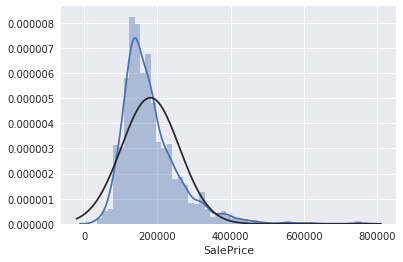

In [344]:
import scipy.stats as st
sns.distplot(train["SalePrice"], kde=True, fit=st.norm)

looking on the graph we can conclude that SalePrice is not normally distributed.

In [345]:
print(train["SalePrice"].skew())
print(train["SalePrice"].kurt())

1.88287575977
6.53628186006


Positive skewness indicates that SalePrice is skewed to right.

In [346]:
train["SalePrice"] = np.log1p(train["SalePrice"])

In [347]:
print(train["SalePrice"].skew())
print(train["SalePrice"].kurt())

0.121346619897
0.809519155708


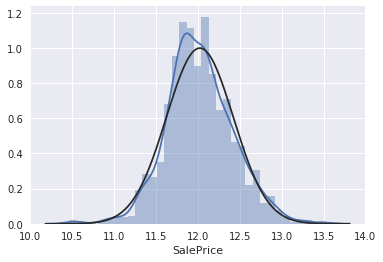

In [348]:
import scipy.stats as st
sns.distplot(train["SalePrice"], kde=True, fit=st.norm)


### What effect does it have on our prediction if SalePrice is not normally distributed and is skewed?
We will come to this point later. But now we should see what are the assumptions in Regression(Considering Ridge and lasso).
1. Dependent variable(SalePrice) should be approximately normally distributed. And henceforth should not be skewed.
2. residual error should be normally distributed. Plotting a graph of residual error vs our prediction gives us a idea about if residual is normally distributed and remedy steps we should take if it is not.



## Plot Numerical Features

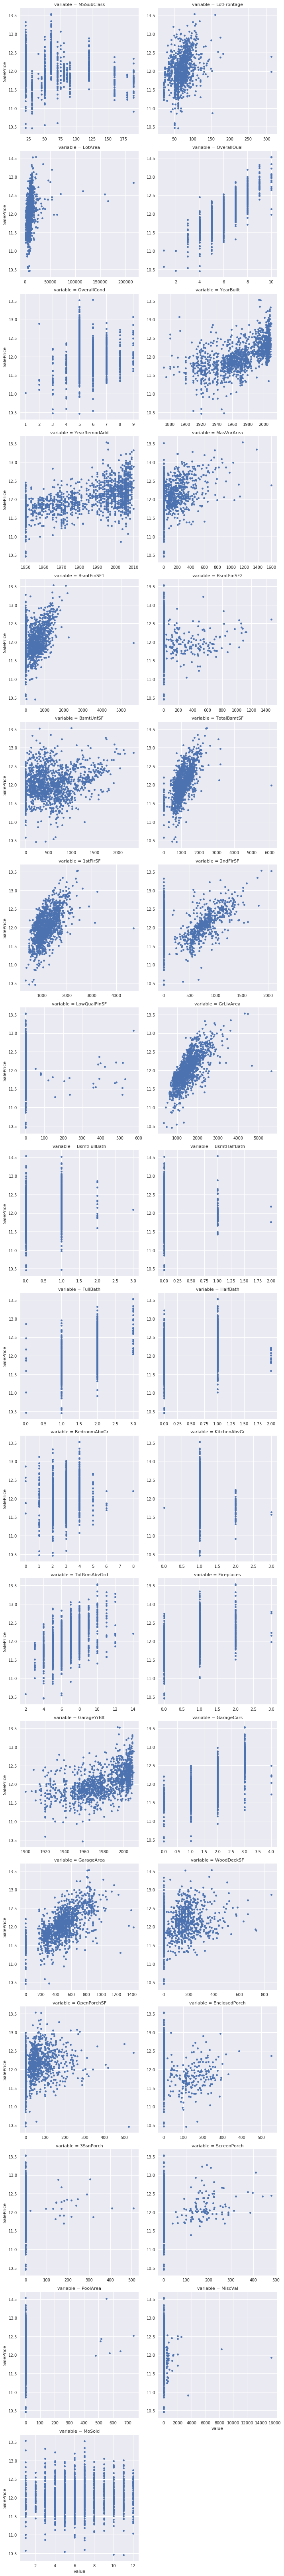

In [349]:
def pairplot(x, y, **kwargs):
    ax = plt.gca()
    ts = pd.DataFrame({'time': x, 'val': y})
    ts.plot.scatter('time', 'val',ax=ax)
f = pd.melt(train, id_vars=["SalePrice"], value_vars=numeric_features[:-1])
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False,size=5 )
g = g.map(pairplot, "value", "SalePrice")

In [350]:
from IPython.display import display, HTML
pd.options.display.max_rows = 10
pd.options.display.max_columns = 90
# train['Fireplaces'].value_counts()

##### Box plot of numerical faetures which have discrete values

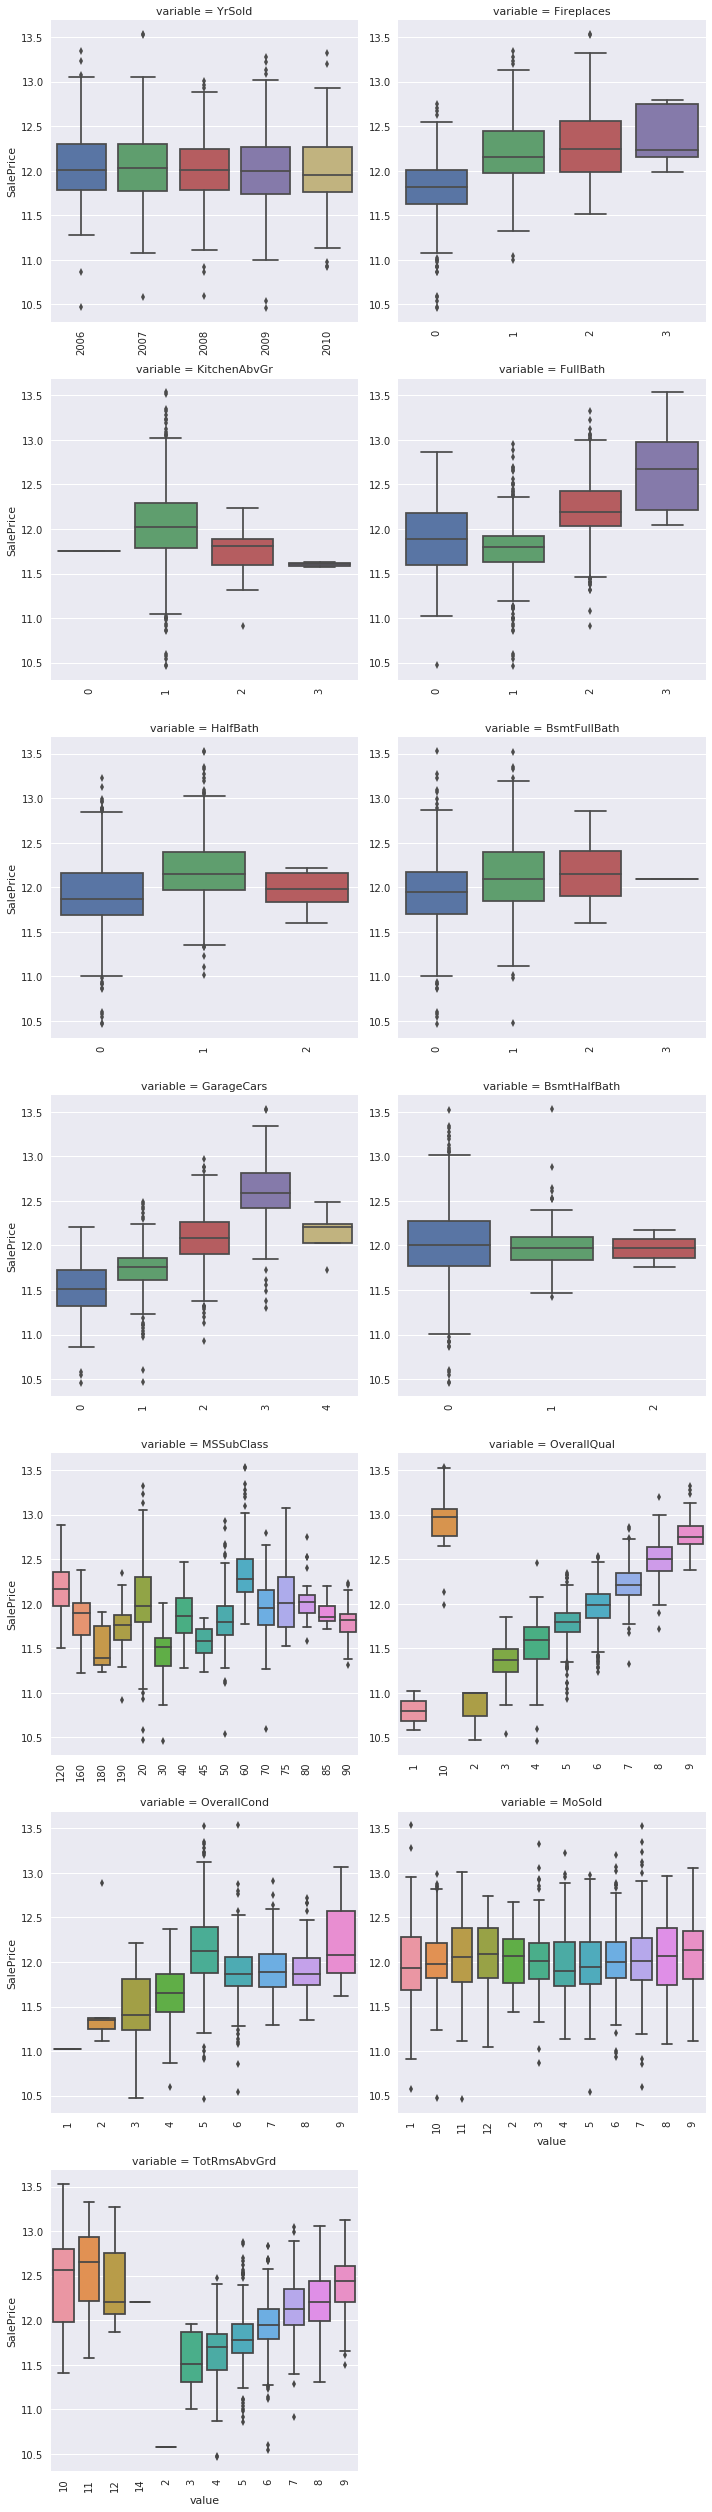

In [351]:
box_feature= ["YrSold", "Fireplaces", "KitchenAbvGr", "FullBath", "HalfBath", "BsmtFullBath","GarageCars",
             "BsmtHalfBath", "MSSubClass","OverallQual", "OverallCond", "MoSold",'TotRmsAbvGrd']
train_temp = train.copy()
for col in box_feature:
    train_temp[col] = train_temp[col].astype(str)
def boxplot(x, y, **kwargs):
    sns.boxplot(x=x, y=y)
    x=plt.xticks(rotation=90)
f = pd.melt(train_temp, id_vars=['SalePrice'], value_vars=box_feature)
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False, size=5)
g = g.map(boxplot, "value", "SalePrice")

del train_temp

In [352]:
#Converting MoSold,MSSubClass to categorical feature
num_to_cat = ['MSSubClass', "MoSold"]
for col in num_to_cat:
    train[col] = train[col].astype('category')
    test[col] = test[col].astype('category')
    numeric_features.remove(col)
    category_feature.append(col)

## Correlation between variables
  We will see the corealation between numeric features and SalePrice

(35, 35)

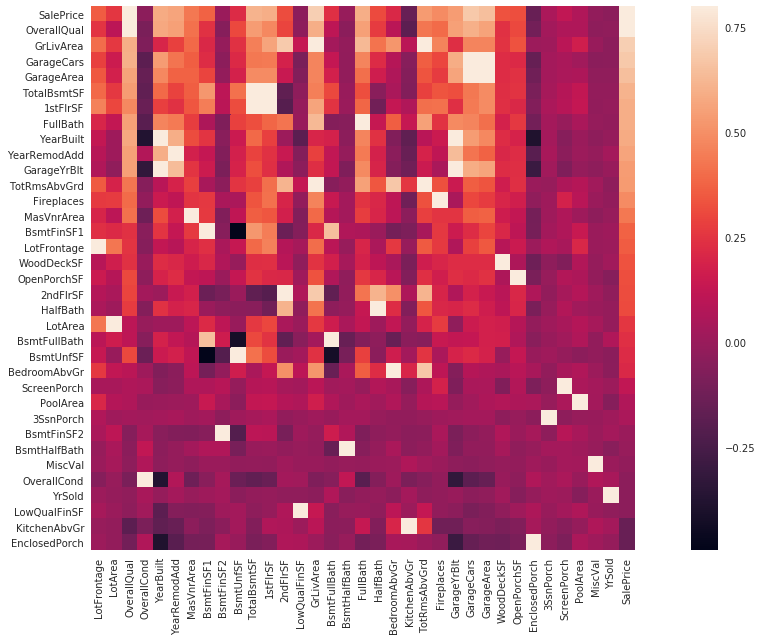

In [353]:
pd.options.display.max_rows = 45
pd.options.display.max_columns = 45
corrmat = train.corr()
corrmat.sort_values("SalePrice",inplace = True, ascending= False)
# print(sorted(list(corrmat["SalePrice"].values)))
plt.figure(figsize=(20,10))
sns.heatmap(corrmat, vmax=.8, square=True );
display(corrmat.shape)

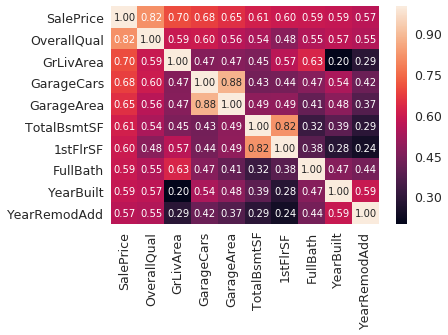

In [354]:
# We will take top 10 most correlated components
# https://www.kaggle.com/pmarcelino/comprehensive-data-exploration-with-python

k= 10
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=False, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()



   1. TotRmsAbvGrd and GrLivArea are significantly correlated so we will only have GrLivArea(Pending FullBath)
   2. GarageCars and GarageArea are highly corelated with each other. So we will only reatain GarageArea. Also GarageYrBlt is highy correlated to GarageArea but I won't drop it as what is the GarageArea have to take with GarageYrBlt also drop is.
   3. TotalBsmtSF and 1stFlrSF are highly correlated so we will drop 1stFlrSF
   4. Pending correlation between YearRemoteAdd and YearBuilt
So now our top components having high corelation with SalePrice are: , GrLivArea, GarageCars, TotalBsmtSF, FullBath, YearBuilt, YearRemodAdd


In [355]:
len(train.columns)

80

In [356]:
# droping TotRmsAbvGrd, 1stFlrSF,  and GarageCars
drop = ['3SsnPorch', 'MiscVal','PoolArea','ScreenPorch']
train.drop(drop, axis = 1, inplace = True)
test.drop(drop, axis = 1, inplace = True)
len(train.columns)
numeric_features = [i for i in numeric_features if i not in drop]
category_feature = [i for i in category_feature if i not in drop]

## Removing Outliars(numerical features)
   **Numerical feature having outliars are**:
             1. GrLivArea -> 4
             2. TotalBsmtSF -> 1
             3. LotFrontage ->2
             4. MasVnrArea ->1
             5. BsmtFinSF1 ->1

In [357]:
#Removing OutLiars:
#GrLivArea
temp = ((train["GrLivArea"]>4000) & (train["SalePrice"]<13))
train.drop((temp[temp == True].index), axis = 0, inplace = True)
#TotalBsmtSF
temp = train["TotalBsmtSF"]>4000
train.drop((temp[temp == True].index), axis = 0, inplace = True)
#LotFrontage
temp = train["LotFrontage"]>300
train.drop((temp[temp == True].index), axis = 0, inplace = True)
#MasVnrArea
temp = train["MasVnrArea"]>1500
train.drop((temp[temp == True].index), axis = 0, inplace = True)
#BsmtFinSF
temp = train["BsmtFinSF1"]>5000
train.drop((temp[temp == True].index), axis = 0, inplace = True)

In [358]:
# train.drop(train.index[train['SalePrice']>500000], axis = 0, inplace = True)

In [359]:
print(297 in train.index)

False


In [360]:
#print numeric and categorical feature again
numeric_features = train.select_dtypes(exclude = ['O','category']).columns
numeric_features_num = len(numeric_features)
category_feature_num = len(category_feature)
print("No of numeric Features: ",numeric_features_num,"\n", numeric_features)
print("No of Categorical Features: ",category_feature_num,"\n", category_feature)

No of numeric Features:  31 
 Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', 'YrSold', 'SalePrice'],
      dtype='object')
No of Categorical Features:  45 
 ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functiona

## Box Plot of categorical data

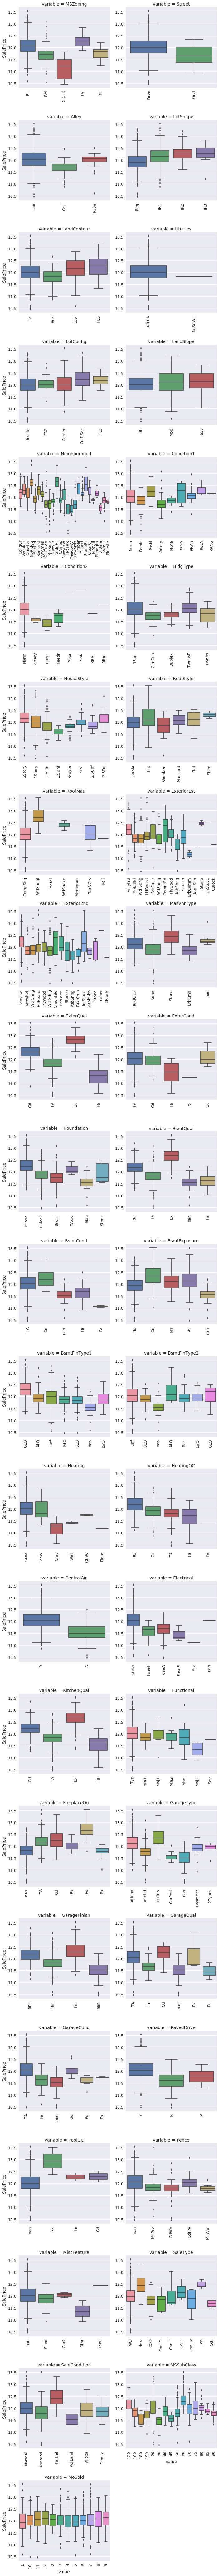

In [361]:
train_temp = train.copy()
for col in category_feature:
    train_temp[col] = train_temp[col].astype(str)
def boxplot(x, y, **kwargs):
    sns.boxplot(x=x, y=y)
    x=plt.xticks(rotation=90)
f = pd.melt(train_temp, id_vars=['SalePrice'], value_vars=category_feature)
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False, size=5)
g = g.map(boxplot, "value", "SalePrice")

del train_temp

## Dropping Categorical Data with very low variance
Idea is adopted from the
notebook of PhilipBall, Link to the notebook is given here
[Notebook](https://www.kaggle.com/fiorenza2/journey-to-the-top-10)

In [362]:
cat_lowVar = [col for col in category_feature if sum(train[col] == train[col].mode()[0])/len(train) > 0.97]
display(train[cat_lowVar].mode())
print(sum(train['Street']==train['Street'].mode()[0]))

Street Utilities Condition2 RoofMatl Heating
0   Pave    AllPub       Norm  CompShg    GasA

1450


In [363]:
train.drop(cat_lowVar, axis = 1, inplace = True)
test.drop(cat_lowVar, axis = 1, inplace = True)
category_feature = [i for i in category_feature if i not in cat_lowVar]

### REMOVE OUTLIERS IN CATEGORICAL DATA

In [364]:
#MSZONING

#Alley
display(train.shape)
temp = train["Alley"].notnull()
temp = temp[temp == True].index
temp = train.loc[temp]["SalePrice"]>250000
train.drop((temp[temp == True].index), axis = 0, inplace = True)
display(train.shape)


(1456, 71)

(1456, 71)


## Missing Data
### 1. Numerical

In [365]:
print("Training Data: ",train.shape)
missing_num = train[numeric_features].isnull().sum()
missing_num = missing_num[missing_num>0]
missing_num.sort_values(inplace = True, ascending = False)
missing_num = pd.DataFrame({"missing":missing_num})
display(missing_num)
missing_num1 = test[numeric_features[:-1]].isnull().sum()
missing_num1 = missing_num1[missing_num1>0]
missing_num1.sort_values(inplace=True,ascending=False)
missing_num1 = pd.DataFrame({"missing": missing_num1})
print("Test Data: ",test.shape)
display(missing_num1)

Training Data:  (1456, 71)


missing
LotFrontage      259
GarageYrBlt       81
MasVnrArea         8

Test Data:  (1459, 70)


missing
LotFrontage       227
GarageYrBlt        78
MasVnrArea         15
BsmtHalfBath        2
BsmtFullBath        2
GarageArea          1
GarageCars          1
TotalBsmtSF         1
BsmtUnfSF           1
BsmtFinSF2          1
BsmtFinSF1          1

### Train Data: Replace Nan in Lot Frontage and MasVnrArea with their mean value GarageYrBlt with mode.
### Test Data: Replace missing data with their mean, except in 'BsmtHalfBath' and 'BsmtFullBath', these have discrete value hence replace with mode().
            

In [366]:
pd.options.display.max_rows = 1400
pd.options.display.max_columns = 70
# train.fillna({'LotFrontage':train['LotFrontage'].mean(),
#               'MasVnrArea':train['MasVnrArea'].mean(), 'GarageYrBlt':
#              train['GarageYrBlt'].mode().values[0]}, inplace = True )
# test.fillna({'BsmtHalfBath':test['BsmtHalfBath'].mode()[0], 
#              'BsmtFullBath':test['BsmtFullBath'].mode()[0],'GarageYrBlt':
#              test['GarageYrBlt'].mode()[0]},inplace = True)
# test.fillna(test[missing_num1.index].mean(), inplace = True)

train.fillna({'LotFrontage':train['LotFrontage'].median(),
              'MasVnrArea':0, 'GarageYrBlt':
             0}, inplace = True )
test.fillna({'BsmtHalfBath':0, 
             'BsmtFullBath':0,
             'GarageYrBlt':0,
             'MasVnrArea':0,
             },inplace = True)
test.fillna(test[missing_num1.index].mean(), inplace = True)

print(test[numeric_features[:-1]].isnull().any().any())
print(train[numeric_features[:-1]].isnull().any().any())


False
False


### 2. Categorical


In [367]:
missing_cat = train[category_feature].isnull().sum()
print(missing_cat)
missing_cat = missing_cat[missing_cat>0]
missing_cat.sort_values(inplace=True,ascending=False)
missing_cat = pd.DataFrame({"missing": missing_cat})
print("Training Data: ")
display(missing_cat)
# train[missing_cat.index] = train[missing_cat.index].astype('category')
for col in category_feature:
    train[col] = train[col].astype('category')
# print(train[missing.index])
missing_cat1 = test[category_feature[:-1]].isnull().sum()
missing_cat1 = missing_cat1[missing_cat1>0]
missing_cat1.sort_values(inplace=True,ascending=False)
missing_cat1 = pd.DataFrame({"missing": missing_cat1})
print("\nTest Data: ")
display(missing_cat1)

for col in category_feature:
    test[col] = test[col].astype('category')
# missing_electrical = train[train["Electrical"].isnull()].index.tolist()
# print(missing_electrical)

MSZoning            0
Alley            1366
LotShape            0
LandContour         0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
BldgType            0
HouseStyle          0
RoofStyle           0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinType2       38
HeatingQC           0
CentralAir          0
Electrical          1
KitchenQual         0
Functional          0
FireplaceQu       690
GarageType         81
GarageFinish       81
GarageQual         81
GarageCond         81
PavedDrive          0
PoolQC           1450
Fence            1175
MiscFeature      1402
SaleType            0
SaleCondition       0
MSSubClass          0
MoSold              0
dtype: int64
Training Data: 


missing
PoolQC           1450
MiscFeature      1402
Alley            1366
Fence            1175
FireplaceQu       690
GarageCond         81
GarageQual         81
GarageFinish       81
GarageType         81
BsmtFinType2       38
BsmtExposure       38
BsmtFinType1       37
BsmtCond           37
BsmtQual           37
MasVnrType          8
Electrical          1


Test Data: 


missing
PoolQC           1456
MiscFeature      1408
Alley            1352
Fence            1169
FireplaceQu       730
GarageCond         78
GarageQual         78
GarageFinish       78
GarageType         76
BsmtCond           45
BsmtQual           44
BsmtExposure       44
BsmtFinType2       42
BsmtFinType1       42
MasVnrType         16
MSZoning            4
Functional          2
Exterior1st         1
SaleType            1
Exterior2nd         1
KitchenQual         1

1. GarageCond, GarageQual, Garagefinish, GarageType should be filled as none because whenever value is none corresponding GarageArea is 0 means no garage is available
2. BsmtCond, BsmtQual, BsmtExposure, BsmtFinType2, BsmtFinType1
- BsmtExposure NaN value should be filled with "N0"
3. NaN value of fence means no fence
4. FireplaceQU, NaN value should be filled with none because corresponding number of places 
5. MasVnrType should be filled none because corresponding MasvnrArea is 0
6. I don't have any idea about electrical. So I will remove the row containing missing data

In [368]:
train['BsmtExposure'].fillna('No', inplace = True)
test['BsmtExposure'].fillna('No', inplace = True)
print(train['BsmtExposure'].isnull().any().any())
for col in missing_cat.index:
    train.replace({col:{"None":np.nan}}, inplace = True)
    train[col] = train[col].astype('category')
    train[col].cat.add_categories("None", inplace = True)
    train[col].fillna("None", inplace = True)
train.drop(train.index[1379], inplace = True)

train['BsmtExposure'].cat.remove_unused_categories(inplace = True)  #"none" is unused category
print(train['BsmtExposure'].isnull().any().any())
#Filling missing data in test
temp = list(missing_cat1.index)
temp = temp[:-1]
for col in temp:
    test.replace({col:{"None":np.nan}}, inplace = True)
    test[col] = test[col].astype('category')
    test[col].cat.add_categories("none", inplace = True)
    test[col].fillna("none", inplace = True)
test['BsmtExposure'].cat.remove_unused_categories(inplace = True)
df =test[missing_cat1.index].mode()
df1 = pd.Series(list(df.values[0,:]), index = df.columns)
test.fillna(df1, inplace = True)


print(test.isnull().any().any())
print(train.isnull().any().any())

False
False
False
False


In [369]:
print(train.shape)
print(test.shape)

(1455, 71)
(1459, 70)


## Transforming skewed features

In [370]:
from scipy.special import boxcox1p
lam = .15
train1 = train.copy()
test1 = test.copy()
all_data = pd.concat([train1, test1])
all_data.drop(['SalePrice'], axis = 1, inplace = True)
numeric_features = numeric_features[:-1]
skewed = all_data[numeric_features].apply(lambda x: skew(x.dropna().astype(float)))
skewed = skewed[skewed>0.75]
skewed = skewed.index
print(all_data.isnull().any().any())
all_data[skewed] = boxcox1p(all_data[skewed], lam)
print(all_data.isnull().any().any())

False
False


In [371]:
train1 = all_data.iloc[:1455]
print(train1.shape)
test1 = all_data.iloc[1455:]
print(test1.shape)
train1["SalePrice"] = train["SalePrice"]
print(train1.isnull().any().any())
print(test1.isnull().any().any())

(1455, 70)
(1459, 70)
False
False


### Plotting Numerical Features(after log transformation)

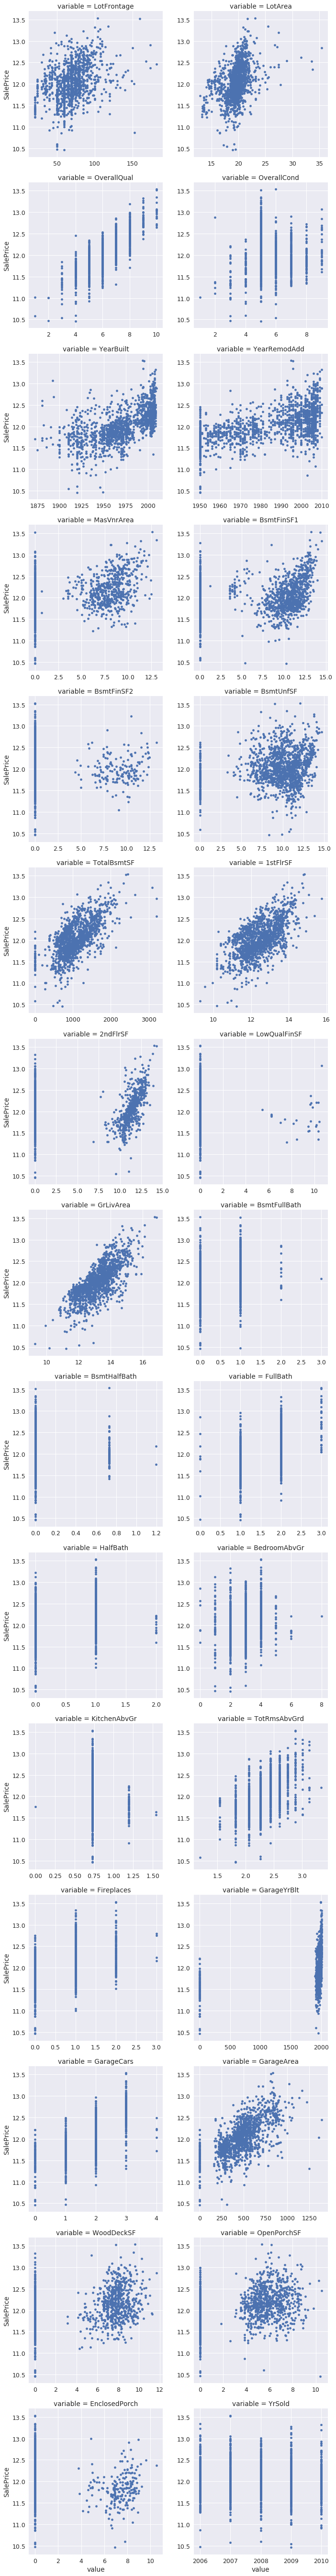

In [372]:
def pairplot(x, y, **kwargs):
    ax = plt.gca()
    ts = pd.DataFrame({'time': x, 'val': y})
    ts.plot.scatter('time', 'val',ax=ax)
f = pd.melt(train1, id_vars=["SalePrice"], value_vars=numeric_features)
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False,size=5 )
g = g.map(pairplot, "value", "SalePrice")

### Plotting Categorical Variable

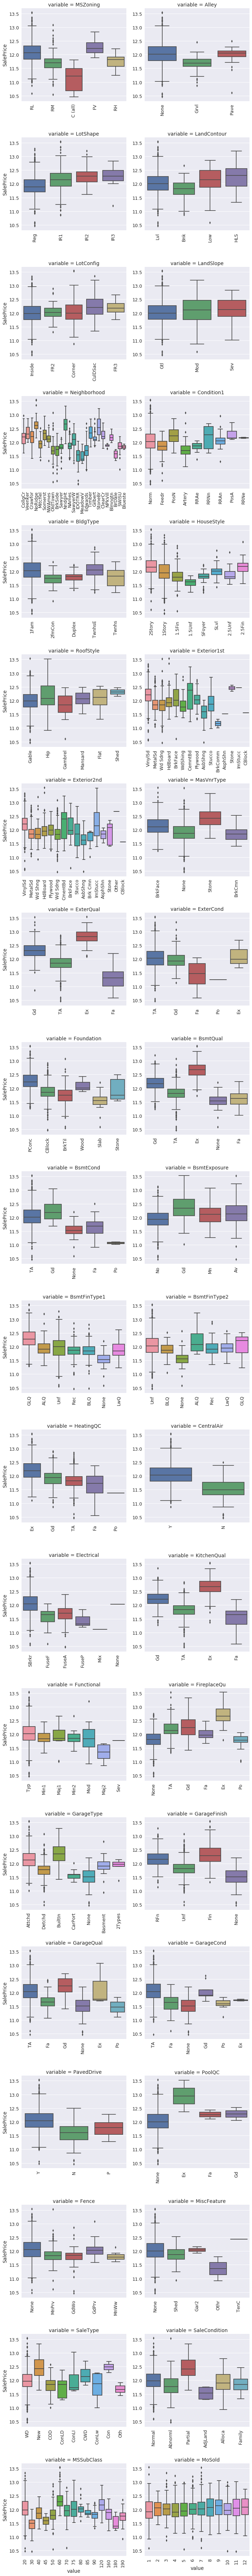

In [373]:
def boxplot(x, y, **kwargs):
    sns.boxplot(x=x, y=y)
    x=plt.xticks(rotation=90)
f = pd.melt(train1, id_vars=['SalePrice'], value_vars=category_feature)
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False, size=5)
g = g.map(boxplot, "value", "SalePrice")

In [374]:
# neighbourhood_map = {'MeadowV':1, 'BrDale':2,''
    
#                      }
neighborhood_map = {
        "MeadowV" : 0,  #  88000
        "IDOTRR" : 1,   # 103000
        "BrDale" : 1,   # 106000
        "OldTown" : 1,  # 119000
        "Edwards" : 1,  # 119500
        "BrkSide" : 1,  # 124300
        "Sawyer" : 1,   # 135000
        "Blueste" : 1,  # 137500
        "SWISU" : 2,    # 139500
        "NAmes" : 2,    # 140000
        "NPkVill" : 2,  # 146000
        "Mitchel" : 2,  # 153500
        "SawyerW" : 2,  # 179900
        "Gilbert" : 2,  # 181000
        "NWAmes" : 2,   # 182900
        "Blmngtn" : 2,  # 191000
        "CollgCr" : 2,  # 197200
        "ClearCr" : 3,  # 200250
        "Crawfor" : 3,  # 200624
        "Veenker" : 3,  # 218000
        "Somerst" : 3,  # 225500
        "Timber" : 3,   # 228475
        "StoneBr" : 4,  # 278000
        "NoRidge" : 4,  # 290000
        "NridgHt" : 4,  # 315000
    }
train1['Neighbourhoodbin'] = train1['Neighborhood'].replace(neighborhood_map)
test1['Neighbourhoodbin'] = test1['Neighborhood'].replace(neighborhood_map)
# print(train1['Neighbourhoodbin'])

## Encoding Variable
### 1.Training Data
** Fisr Let's print various categories and divide them in nominal and ordinal variable**

In [375]:
print(train1.shape, test1.shape)

(1455, 72) (1459, 71)


In [376]:
for col in category_feature:
    train1[col] = train1[col].astype('category')
    print(col)
    print(train1[col].unique())

MSZoning
[RL, RM, C (all), FV, RH]
Categories (5, object): [RL, RM, C (all), FV, RH]
Alley
[None, Grvl, Pave]
Categories (3, object): [None, Grvl, Pave]
LotShape
[Reg, IR1, IR2, IR3]
Categories (4, object): [Reg, IR1, IR2, IR3]
LandContour
[Lvl, Bnk, Low, HLS]
Categories (4, object): [Lvl, Bnk, Low, HLS]
LotConfig
[Inside, FR2, Corner, CulDSac, FR3]
Categories (5, object): [Inside, FR2, Corner, CulDSac, FR3]
LandSlope
[Gtl, Mod, Sev]
Categories (3, object): [Gtl, Mod, Sev]
Neighborhood
[CollgCr, Veenker, Crawfor, NoRidge, Mitchel, ..., NPkVill, Blmngtn, BrDale, SWISU, Blueste]
Length: 25
Categories (25, object): [CollgCr, Veenker, Crawfor, NoRidge, ..., Blmngtn, BrDale, SWISU, Blueste]
Condition1
[Norm, Feedr, PosN, Artery, RRAe, RRNn, RRAn, PosA, RRNe]
Categories (9, object): [Norm, Feedr, PosN, Artery, ..., RRNn, RRAn, PosA, RRNe]
BldgType
[1Fam, 2fmCon, Duplex, TwnhsE, Twnhs]
Categories (5, object): [1Fam, 2fmCon, Duplex, TwnhsE, Twnhs]
HouseStyle
[2Story, 1Story, 1.5Fin, 1.5Unf, SF

**Ordinal Variables**: PoolQC, FireplaceQu, GarageCond, GarageQual, BsmtExposure, BsmtCond, BsmtQual, ExterQual,
                                      ExterCond, HeatingQC, KitchenQual, *MSSubClass, MoSold*

In [377]:
ord_cat = ["PoolQC", "FireplaceQu", 'BsmtCond', 'GarageCond', 
           'BsmtQual', 'ExterQual','ExterCond', 'HeatingQC', 'KitchenQual']
dic_num = {'None': 1, 'none':1, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}
#, 'GarageCond', 'GarageQual'

In [378]:
# BsmtExposure has categories: Av, Gd, Mn, No 
train1['BsmtExposure'].replace({'No':1,'Av':2,'Gd':3,'Mn':2},inplace = True)
train1['BsmtExposure'] = train1['BsmtExposure'].astype('float64')
cat1 = list(train1['MSSubClass'].cat.categories)
d1 = dict(zip(cat1, np.arange(1,len(cat1)+1)))
print(cat1)
train1.replace({'MSSubClass': d1}, inplace = True)
for col in ord_cat:
    train1[col].replace(dic_num, inplace = True)
    train1[col] = train1[col].astype('float64')

# all_data.replace({
    
# })

[20, 30, 40, 45, 50, 60, 70, 75, 80, 85, 90, 120, 160, 180, 190]


In [379]:
pd.options.display.max_columns = 70
print((train1.select_dtypes(exclude = ['O','category']).columns))

Index(['1stFlrSF', '2ndFlrSF', 'BedroomAbvGr', 'BsmtCond', 'BsmtExposure',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtQual',
       'BsmtUnfSF', 'EnclosedPorch', 'ExterCond', 'ExterQual', 'FireplaceQu',
       'Fireplaces', 'FullBath', 'GarageArea', 'GarageCars', 'GarageCond',
       'GarageYrBlt', 'GrLivArea', 'HalfBath', 'HeatingQC', 'KitchenAbvGr',
       'KitchenQual', 'LotArea', 'LotFrontage', 'LowQualFinSF', 'MSSubClass',
       'MasVnrArea', 'OpenPorchSF', 'OverallCond', 'OverallQual', 'PoolQC',
       'TotRmsAbvGrd', 'TotalBsmtSF', 'WoodDeckSF', 'YearBuilt',
       'YearRemodAdd', 'YrSold', 'SalePrice', 'Neighbourhoodbin'],
      dtype='object')


In [380]:
# numeric_features = list(train1.select_dtypes(exclude = ['O','category']).columns)
# numeric_features = numeric_features[:-1]
# def pairplot(x, y, **kwargs):
#     ax = plt.gca()
#     ts = pd.DataFrame({'time': x, 'val': y})
#     ts.plot.scatter('time', 'val',ax=ax)
# f = pd.melt(train1, id_vars=["SalePrice"], value_vars=numeric_features)
# g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False,size=5 )
# g = g.map(pairplot, "value", "SalePrice")
ord_cat = ["PoolQC", "FireplaceQu", 'BsmtCond', 'GarageCond', 
           'BsmtQual', 'ExterQual','ExterCond', 'HeatingQC', 'KitchenQual']

## 2. Test Data(Encoding Categorical Variable)

In [381]:
for col in category_feature:
    test1[col]= test1[col].astype('category')
    print(col)
    print(test[col].cat.categories)

MSZoning
Index(['C (all)', 'FV', 'RH', 'RL', 'RM', 'none'], dtype='object')
Alley
Index(['Grvl', 'Pave', 'none'], dtype='object')
LotShape
Index(['IR1', 'IR2', 'IR3', 'Reg'], dtype='object')
LandContour
Index(['Bnk', 'HLS', 'Low', 'Lvl'], dtype='object')
LotConfig
Index(['Corner', 'CulDSac', 'FR2', 'FR3', 'Inside'], dtype='object')
LandSlope
Index(['Gtl', 'Mod', 'Sev'], dtype='object')
Neighborhood
Index(['Blmngtn', 'Blueste', 'BrDale', 'BrkSide', 'ClearCr', 'CollgCr',
       'Crawfor', 'Edwards', 'Gilbert', 'IDOTRR', 'MeadowV', 'Mitchel',
       'NAmes', 'NPkVill', 'NWAmes', 'NoRidge', 'NridgHt', 'OldTown', 'SWISU',
       'Sawyer', 'SawyerW', 'Somerst', 'StoneBr', 'Timber', 'Veenker'],
      dtype='object')
Condition1
Index(['Artery', 'Feedr', 'Norm', 'PosA', 'PosN', 'RRAe', 'RRAn', 'RRNe',
       'RRNn'],
      dtype='object')
BldgType
Index(['1Fam', '2fmCon', 'Duplex', 'Twnhs', 'TwnhsE'], dtype='object')
HouseStyle
Index(['1.5Fin', '1.5Unf', '1Story', '2.5Unf', '2Story', 'SFoyer', 

**Ordinal Variable**: ExterQual, ExterCond, BsmtQual, BsmtExposure, BsmtCond,  HeatingQC, FireplaceQu, GarageQual, GarageCond, PoolQC, MSSubClass, MoSold

In [382]:
ord_cat1 = ['ExterQual', 'ExterCond', 'BsmtQual', 'GarageCond', 'BsmtCond', 'HeatingQC', 
           'FireplaceQu', 'PoolQC','KitchenQual']
#'GarageQual', 'GarageCond'

In [383]:
# BsmtExposure has categories: Av, Gd, Mn, No 
print(test['BsmtExposure'].head())
test1['BsmtExposure'].replace({'No':1,'Av':2,'Gd':3,'Mn':2}, inplace = True)
test1['BsmtExposure'] = test1['BsmtExposure'].astype('float64')
cat1 = list(test1['MSSubClass'].cat.categories)
d1 = dict(zip(cat1, np.arange(1,len(cat1)+1)))
test1.replace({'MSSubClass': d1}, inplace = True)
for col in ord_cat1:
    print(col)
    test1[col].replace(dic_num, inplace = True)
    test1[col] = test1[col].astype('float64')
print(test['BsmtExposure'].head())

0    No
1    No
2    No
3    No
4    No
Name: BsmtExposure, dtype: category
Categories (4, object): [Av, Gd, Mn, No]
ExterQual
ExterCond
BsmtQual
GarageCond
BsmtCond
HeatingQC
FireplaceQu
PoolQC
KitchenQual
0    No
1    No
2    No
3    No
4    No
Name: BsmtExposure, dtype: category
Categories (4, object): [Av, Gd, Mn, No]


In [384]:
train1['OverallCond_cat'] = train1['OverallCond'].astype('category')
test1['OverallCond_cat'] = test1['OverallCond'].astype('category')

<hr>

### Get Dummy Variables

In [385]:
SP = train1['SalePrice']

In [386]:
train2 =pd.get_dummies(train1, drop_first = False)
display(train2.head(n=1))

1stFlrSF   2ndFlrSF  BedroomAbvGr  BsmtCond  BsmtExposure  BsmtFinSF1  \
0  11.692623  11.686189             3       3.0           1.0   11.170327   

   BsmtFinSF2  BsmtFullBath  BsmtHalfBath  BsmtQual  BsmtUnfSF  EnclosedPorch  \
0         0.0           1.0           0.0       4.0   7.483296            0.0   

   ExterCond  ExterQual  FireplaceQu  Fireplaces  FullBath  GarageArea  \
0        3.0        4.0          1.0           0         2       548.0   

   GarageCars  GarageCond  GarageYrBlt  GrLivArea  HalfBath  HeatingQC  \
0         2.0         3.0       2003.0  13.698888         1        5.0   

   KitchenAbvGr  KitchenQual    LotArea  LotFrontage  LowQualFinSF  \
0      0.730463          4.0  19.212182         65.0           0.0   

   MSSubClass  MasVnrArea  OpenPorchSF  OverallCond  OverallQual  PoolQC  \
0           6    8.059126     5.714669            5            7     1.0   

         ...          Neighborhood_Timber  Neighborhood_Veenker  PavedDrive_N  \
0        ...                            0                     0             0   

   PavedDrive_P  PavedDrive_Y  RoofStyle_Flat  RoofStyle_Gable  \
0             0             1               0                1   

   RoofStyle_Gambrel  RoofStyle_Hip  RoofStyle_Mansard  RoofStyle_Shed  \
0                  0              0                  0               0   

   SaleCondition_Abnorml  SaleCondition_AdjLand  SaleCondition_Alloca  \
0                      0                      0                     0   

   SaleCondition_Family  SaleCondition_Normal  SaleCondition_Partial  \
0                     0                     1                      0   

   SaleType_COD  SaleType_CWD  SaleType_Con  SaleType_ConLD  SaleType_ConLI  \
0             0             0             0               0               0   

   SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  OverallCond_cat_1  \
0               0             0             0            1                  0   

   OverallCond_cat_2  OverallCond_cat_3  OverallCond_cat_4  OverallCond_cat_5  \
0                  0                  0                  0                  1   

   OverallCond_cat_6  OverallCond_cat_7  OverallCond_cat_8  OverallCond_cat_9  
0                  0                  0                  0                  0  

[1 rows x 256 columns]

In [387]:
test2 = pd.get_dummies(test1, drop_first = False)
display(test2.head(n = 1))

1stFlrSF  2ndFlrSF  BedroomAbvGr  BsmtCond  BsmtExposure  BsmtFinSF1  \
0  11.81868       0.0             2       3.0           1.0   10.105326   

   BsmtFinSF2  BsmtFullBath  BsmtHalfBath  BsmtQual  BsmtUnfSF  EnclosedPorch  \
0    7.397498           0.0           0.0       3.0   8.780689            0.0   

   ExterCond  ExterQual  FireplaceQu  Fireplaces  FullBath  GarageArea  \
0        3.0        3.0          1.0           0         1       730.0   

   GarageCars  GarageCond  GarageYrBlt  GrLivArea  HalfBath  HeatingQC  \
0         1.0         3.0       1961.0   11.81868         0        3.0   

   KitchenAbvGr  KitchenQual    LotArea  LotFrontage  LowQualFinSF  \
0      0.730463          3.0  20.479373         80.0           0.0   

   MSSubClass  MasVnrArea  OpenPorchSF  OverallCond  OverallQual  PoolQC  \
0           1         0.0          0.0            6            5     1.0   

         ...          Neighborhood_Veenker  PavedDrive_N  PavedDrive_P  \
0        ...                             0             0             0   

   PavedDrive_Y  RoofStyle_Flat  RoofStyle_Gable  RoofStyle_Gambrel  \
0             1               0                1                  0   

   RoofStyle_Hip  RoofStyle_Mansard  RoofStyle_Shed  SaleCondition_Abnorml  \
0              0                  0               0                      0   

   SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
0                      0                     0                     0   

   SaleCondition_Normal  SaleCondition_Partial  SaleType_COD  SaleType_CWD  \
0                     1                      0             0             0   

   SaleType_Con  SaleType_ConLD  SaleType_ConLI  SaleType_ConLw  SaleType_New  \
0             0               0               0               0             0   

   SaleType_Oth  SaleType_WD  SaleType_none  OverallCond_cat_1  \
0             0            1              0                  0   

   OverallCond_cat_2  OverallCond_cat_3  OverallCond_cat_4  OverallCond_cat_5  \
0                  0                  0                  0                  0   

   OverallCond_cat_6  OverallCond_cat_7  OverallCond_cat_8  OverallCond_cat_9  
0                  1                  0                  0                  0  

[1 rows x 252 columns]

In [388]:
del_features1 = [i for i in train2.columns if i not in test2.columns]
del_features2 = [i for i in test2.columns if i not in train2.columns]
del_features = del_features1 + del_features2
print(del_features)

['SalePrice', 'Alley_None', 'BsmtFinType1_None', 'BsmtFinType2_None', 'Electrical_Mix', 'Electrical_None', 'Exterior1st_ImStucc', 'Exterior1st_Stone', 'Exterior2nd_Other', 'Fence_None', 'GarageFinish_None', 'GarageQual_Ex', 'GarageQual_None', 'GarageType_None', 'HouseStyle_2.5Fin', 'MasVnrType_None', 'MiscFeature_None', 'MiscFeature_TenC', 'Alley_none', 'BsmtFinType1_none', 'BsmtFinType2_none', 'Exterior1st_none', 'Exterior2nd_none', 'Fence_none', 'Functional_none', 'GarageFinish_none', 'GarageQual_none', 'GarageType_none', 'MSZoning_none', 'MasVnrType_none', 'MiscFeature_none', 'SaleType_none']


In [389]:
for i in del_features1:
    train2.drop(i, axis = 1, inplace = True)
for i in del_features2:
    test2.drop(i, axis = 1, inplace = True)

<hr>

#### Remove Unecessry Variables

In [390]:
del_col = []
for col in train2.columns:
#     print(col)
    temp1 = train2[col].value_counts().max()/train.shape[0]
    temp2 = test2[col].value_counts().max()/test.shape[0]
#     print(temp1, temp2)
    if(temp1>0.97 and temp2>0.97):
        del_col.append(col)
print(len(del_col))

86


In [391]:
train2.drop(del_col, axis = 1, inplace = True)
test2.drop(del_col, axis = 1, inplace = True)

<hr>

#### Add Polynomial Feature

In [392]:
pd.DataFrame(train2.columns)

0
0                 1stFlrSF
1                 2ndFlrSF
2             BedroomAbvGr
3                 BsmtCond
4             BsmtExposure
5               BsmtFinSF1
6               BsmtFinSF2
7             BsmtFullBath
8             BsmtHalfBath
9                 BsmtQual
10               BsmtUnfSF
11           EnclosedPorch
12               ExterCond
13               ExterQual
14             FireplaceQu
15              Fireplaces
16                FullBath
17              GarageArea
18              GarageCars
19              GarageCond
20             GarageYrBlt
21               GrLivArea
22                HalfBath
23               HeatingQC
24            KitchenAbvGr
25             KitchenQual
26                 LotArea
27             LotFrontage
28              MSSubClass
29              MasVnrArea
30             OpenPorchSF
31             OverallCond
32             OverallQual
33            TotRmsAbvGrd
34             TotalBsmtSF
35              WoodDeckSF
36               YearBuilt
37            YearRemodAdd
38                  YrSold
39        Neighbourhoodbin
40              Alley_Grvl
41           BldgType_1Fam
42         BldgType_Duplex
43          BldgType_Twnhs
44         BldgType_TwnhsE
45        BsmtFinType1_ALQ
46        BsmtFinType1_BLQ
47        BsmtFinType1_GLQ
48        BsmtFinType1_LwQ
49        BsmtFinType1_Rec
50        BsmtFinType1_Unf
51        BsmtFinType2_LwQ
52        BsmtFinType2_Rec
53        BsmtFinType2_Unf
54            CentralAir_N
55            CentralAir_Y
56       Condition1_Artery
57        Condition1_Feedr
58         Condition1_Norm
59        Electrical_FuseA
60        Electrical_SBrkr
61     Exterior1st_BrkFace
62     Exterior1st_CemntBd
63     Exterior1st_HdBoard
64     Exterior1st_MetalSd
65     Exterior1st_Plywood
66     Exterior1st_VinylSd
67     Exterior1st_Wd Sdng
68     Exterior2nd_CmentBd
69     Exterior2nd_HdBoard
70     Exterior2nd_MetalSd
71     Exterior2nd_Plywood
72     Exterior2nd_VinylSd
73     Exterior2nd_Wd Sdng
74             Fence_GdPrv
75              Fence_GdWo
76             Fence_MnPrv
77       Foundation_BrkTil
78       Foundation_CBlock
79        Foundation_PConc
80          Functional_Typ
81        GarageFinish_Fin
82        GarageFinish_RFn
83        GarageFinish_Unf
84           GarageQual_Fa
85           GarageQual_TA
86       GarageType_Attchd
87      GarageType_BuiltIn
88       GarageType_Detchd
89       HouseStyle_1.5Fin
90       HouseStyle_1Story
91       HouseStyle_2Story
92       HouseStyle_SFoyer
93         HouseStyle_SLvl
94         LandContour_Bnk
95         LandContour_HLS
96         LandContour_Lvl
97           LandSlope_Gtl
98           LandSlope_Mod
99        LotConfig_Corner
100      LotConfig_CulDSac
101          LotConfig_FR2
102       LotConfig_Inside
103           LotShape_IR1
104           LotShape_Reg
105            MSZoning_FV
106            MSZoning_RL
107            MSZoning_RM
108     MasVnrType_BrkFace
109       MasVnrType_Stone
110       MiscFeature_Shed
111               MoSold_1
112               MoSold_2
113               MoSold_3
114               MoSold_4
115               MoSold_5
116               MoSold_6
117               MoSold_7
118               MoSold_8
119               MoSold_9
120              MoSold_10
121              MoSold_11
122              MoSold_12
123   Neighborhood_BrkSide
124   Neighborhood_CollgCr
125   Neighborhood_Crawfor
126   Neighborhood_Edwards
127   Neighborhood_Gilbert
128    Neighborhood_IDOTRR
129   Neighborhood_Mitchel
130     Neighborhood_NAmes
131    Neighborhood_NWAmes
132   Neighborhood_NridgHt
133   Neighborhood_OldTown
134    Neighborhood_Sawyer
135   Neighborhood_SawyerW
136   Neighborhood_Somerst
137           PavedDrive_N
138           PavedDrive_Y
139        RoofStyle_Gable
140          RoofStyle_Hip
141  SaleCondition_Abnorml
142   SaleCondition_Normal
143  SaleCondition_Partial
144           SaleType_COD
145           SaleType_New
146            SaleType_WD
147      OverallCond_cat_4
14

In [393]:
# train2['OverallQual_cond'] = train2['OverallQual']*train2['OverallCond']
# test2['OverallQual_cond'] = test2['OverallQual']*test2['OverallCond']
# ###################################################
# train2['OverallQual_2'] = train2['OverallQual']**2
# test2['OverallQual_2'] = test2['OverallQual']**2
# ###################################################
# train2['totalBath'] = train2['FullBath'] + train2['HalfBath']
# test2['totalBath'] = test2['FullBath'] + test2['HalfBath']
# train2.drop(['FullBath','HalfBath'], axis = 1, inplace = True)
# test2.drop(['FullBath', 'HalfBath'], axis = 1, inplace = True)
############################################################
# train2['TotalSurface'] = train2['2ndFlrSF']+train2['1stFlrSF'] + train2['TotalBsmtSF']
# test2['TotalSurface'] = test2['2ndFlrSF']+test2['1stFlrSF'] + test2['TotalBsmtSF']
############################################################
#'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
# plt.scatter(train2['TotalBsmtSF'], SP)
# plt.show()
# plt.scatter(train2['2ndFlrSF']+train2['1stFlrSF'] * train2['TotalBsmtSF'], SP)
# plt.show()
# print(train2.isnull().any())

<hr>

In [394]:
print(train2.shape, SP.shape)
print(test2.shape)

(1455, 152) (1455,)
(1459, 152)


In [458]:
x_test = train2.values[1022:,:]
y_test = SP.values[1022:]

### Train Models

#### 1.Logistic Regression 

200
0.0143700250533 0.312056857647
300
0.0301925124225 0.167300652618
400
0.038273663342 0.114354847093
500
0.0456986096065 0.116069994603
600
0.0471946595904 0.108710312728
700
0.0533482759456 0.100176015066
800
0.0553274700385 0.0965326014748
900
0.0566751099536 0.0959644511654
1000
0.0596380471943 0.0913426884634
1022
0.0601415439897 0.0883884005494
1455
0.0629862592775 0.0605734781778


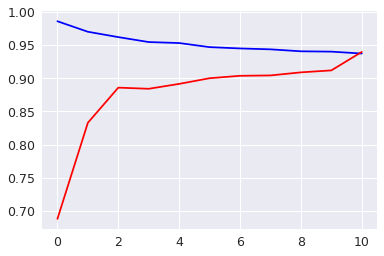

0.00732191274306


In [396]:
import numpy as np
def rmsle(predicted, actual):
    assert(len(predicted) == len(actual))
    p = np.log(np.array(predicted) + 1)
    a = np.log(np.array(actual) + 1)
    return (((p - a)**2).sum() / len(predicted))**0.5

from sklearn.linear_model import LinearRegression
regr = LinearRegression()
it = [200, 300, 400,500, 600, 700, 800, 900, 1000, 1022,1455]
J1,J2 = [],[]
for iteration in it:
    regr = LinearRegression()
    regr.fit(train2.values[:iteration,:], SP.values[:iteration])
    print(iteration)
    score1 = regr.score(train2.values[:iteration,:], SP.values[:iteration])
    score2 = regr.score(x_test, y_test)
    J1.append(score1)
    J2.append(score2)
    print(1 - score1,1-score2)
    
plt.plot(J1,'b-',label="J_train")
plt.plot(J2,'r-',label="J_test")
# plt.label()
plt.show()
y_pred1 = regr.predict(x_test)
error = rmsle(y_pred1, y_test)
print(error)
y_pred_regr = regr.predict(test2.values)
y_pred_regr[y_pred_regr<0] = 0
y_pred_regr = np.exp(y_pred_regr)
sub1 = pd.DataFrame()
sub1['Id']=ID
sub1['SalePrice']=y_pred_regr
sub1.to_csv("prediction_LRegr.csv",index=False)

In [397]:
# (lr.coef_[lr.coef_<0]).shape

#### 2. Lasso

100
200
0.0172204048293 0.211981856326
300
0.0324814607873 0.13206577986
400
0.0395523461839 0.098300018863
500
0.0466290390312 0.1054609724
600
0.047946427667 0.10048346614
700
0.0539428669397 0.0960763800003
800
0.0558346802344 0.0936334996827
900
0.0571795244336 0.0935790949498
950
0.0577753564085 0.0900890557033
1000
0.0601285364002 0.0886802199026
1022
0.060645505791 0.0857792475272


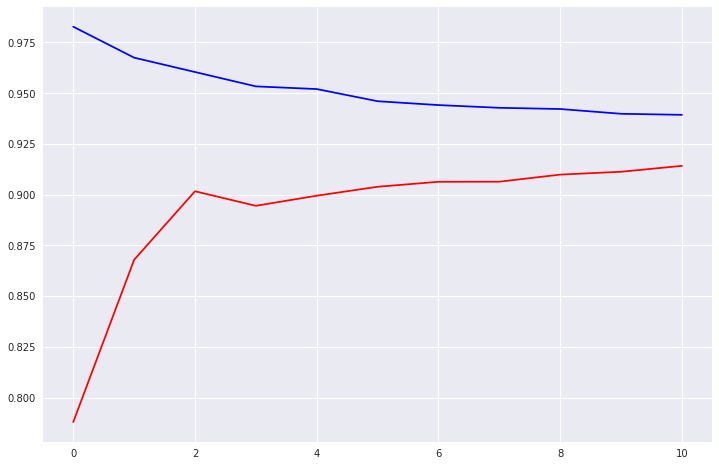

In [459]:
import numpy as np
def rmsle(predicted, actual):
    assert(len(predicted) == len(actual))
    p = np.log(np.array(predicted) + 1)
    a = np.log(np.array(actual) + 1)
    return (((p - a)**2).sum() / len(predicted))**0.5

from sklearn.linear_model import Lasso
it = [200, 300, 400,500, 600, 700, 800, 900, 950,1000, 1022]
J1,J2 = [],[]
# alpha =[1,10,100,140,200,1000]
alpha = [100]
for al in alpha:
    print(al)
    J1,J2= [],[]
    for iteration in it:
        lr = Lasso(0.000092, max_iter= 1000000)
        lr.fit(train2.values[:iteration,:], SP.values[:iteration])
        print(iteration)
        score1 = lr.score(train2.values[:iteration,:], SP.values[:iteration])
        score2 = lr.score(x_test, y_test)
#         y_pred1 = lr.predict(train2.values[:iteration,:])
#         score1 = rmsle(y_pred1, SP.values[:iteration])
#         y_pred1 = lr.predict(x_test)
#         score2 = rmsle(y_pred1, y_test)
        J1.append(score1)
        J2.append(score2)
        print(1 - score1, 1 - score2)
    
    plt.plot(J1,'b-',label="J_train")
    plt.plot(J2,'r-',label="J_test")
    # plt.label()
    plt.show()
#     y_pred1 = lr.predict(x_test)
#     error = rmsle(y_pred1, y_test)
#     print(error)
lr.fit(train2.values, SP.values)
y_pred_lasso = lr.predict(test2.values)
# print(lr.coef_)
# print(all_data.head())
y_pred_lasso[y_pred_lasso<0] = 0
y_pred_lasso = np.exp(y_pred_lasso)
sub1 = pd.DataFrame()
sub1['Id']=ID
sub1['SalePrice']=y_pred_lasso
# sub1.to_csv("prediction_lasso.csv",index=False)

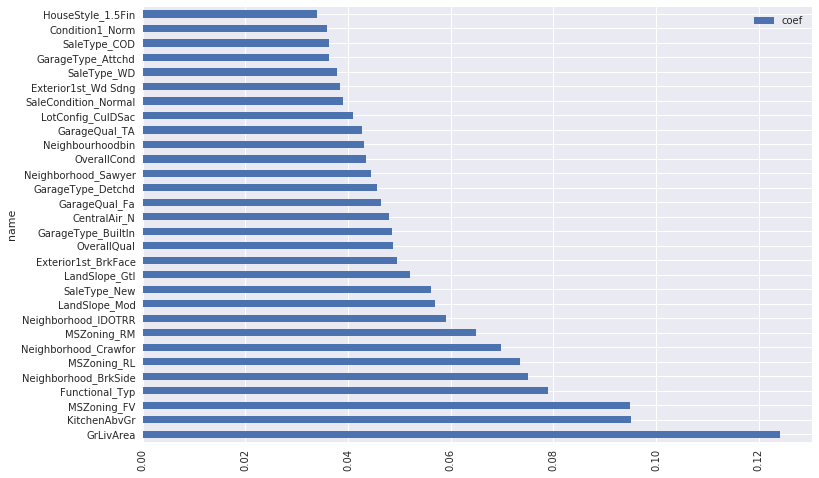

In [411]:

# (lr.coef_[lr.coef_ == 0.0]).shape
# print(len(train1.columns))
# print(lr.coef_.shape)
df_t  = pd.DataFrame({'name':train2.columns,'coef':np.abs(lr.coef_)})
df_t.sort_values('coef', inplace = True, ascending = False)
# # print(np.sort(lr.coef_))
# display(df_t)
sns.set(rc ={'figure.figsize':(12,8)})
# ax1 = plt.figure(figsize = (8,8))
# ax1 = ax1.add_subplot(111)
# sns.barplot(x = 'name', y = 'coef', data = df_t.head(n=20),orient="v", ax = ax1)
df_t.head(n=30).plot(x = 'name', y= 'coef', kind = 'barh')
plt.xticks(rotation = 90)
sns.set()

#### 3. Ridge Regression

100
200
0.0146219509364 0.291720927633
300
0.0305916460228 0.161659516564
400
0.0384523737073 0.11328555977
500
0.0457001029464 0.115626326771
600
0.0471980828268 0.108439396016
700
0.0533485949774 0.10007511298
800
0.055328687654 0.0964942720219
900
0.0566754022182 0.0959407635096
950
0.0572609551254 0.0923965039714
1000
0.0596435466899 0.0913147857686
1022
0.0601505777109 0.0883268461393


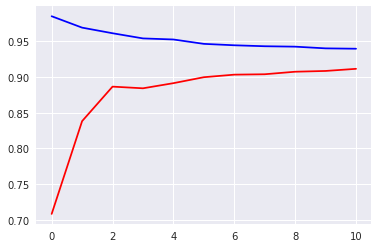

(1459,)


In [400]:
import numpy as np
def rmsle(predicted, actual):
    assert(len(predicted) == len(actual))
    p = np.log(np.array(predicted) + 1)
    a = np.log(np.array(actual) + 1)
    return (((p - a)**2).sum() / len(predicted))**0.5

from sklearn.linear_model import Ridge
it = [200, 300, 400,500, 600, 700, 800, 900, 950,1000, 1022,]
J1,J2 = [],[]
# alpha =[1,10,100,140,200,1000]
alpha = [100]
for al in alpha:
    print(al)
    J1,J2= [],[]
    for iteration in it:
        rdg = Ridge(0.01, max_iter= 10000)
        rdg.fit(train2.values[:iteration,:], SP.values[:iteration])
        print(iteration)
        score1 = rdg.score(train2.values[:iteration,:], SP.values[:iteration])
        score2 = rdg.score(x_test, y_test)
        J1.append(score1)
        J2.append(score2)
        print(1- score1, 1- score2)
    
    plt.plot(J1,'b-',label="J_train")
    plt.plot(J2,'r-',label="J_test")
    # plt.label()
    plt.show()
#     y_pred1 = rdg.predict(x_test)
#     error = rmsle(y_pred1, y_test)
#     print(error)
rdg.fit(train2.values, SP.values)
y_pred_ridge = rdg.predict(test2.values)
y_pred_ridge[y_pred_ridge<0] = 0
y_pred_ridge = np.exp(y_pred_ridge)
# y_pred = 0.5*y_pred_ridge + 0.5*y_pred_lasso
sub1 = pd.DataFrame()
sub1['Id']=ID
sub1['SalePrice']=y_pred_ridge
sub1.to_csv("prediction_ridge.csv",index=False)
print(y_pred_ridge.shape)

In [401]:
(rdg.coef_[rdg.coef_ < 0.01]).shape

(93,)

##### Grid Search 

In [402]:
## from sklearn.model_selection import GridSearchCV
# parameters = [{'alpha':[0.1,0.01,0.001,0.000092,0.0001,0.0002,0.0003,2,5,10,20,30,50,100],'max_iter':[100000]}]
# grid_search = GridSearchCV(estimator = rdg, param_grid = parameters, scoring = 'r2', cv =10)
# grid_search.fit(train2.values, SP.values)
# best_accuracy = grid_search.best_score_
# best_parameters = grid_search.best_params_
# print(best_accuracy)
# print(best_parameters)

#### 4. Random Forest

100
200
0.0363129562819 0.160304334473
300
0.0270779962374 0.153352002677
400
0.0227682924344 0.142799990992
500
0.0261950959907 0.149351169917
600
0.023486647929 0.132853284321
700
0.0238529180806 0.12874575182
800
0.0231508244403 0.131301532737
900
0.0232788169649 0.128745978772
950
0.0232952573529 0.128240076697
1000
0.0227977275924 0.120953990071
1022
0.0231417206723 0.12523844715
1455
0.0221546315297 0.0208512886618


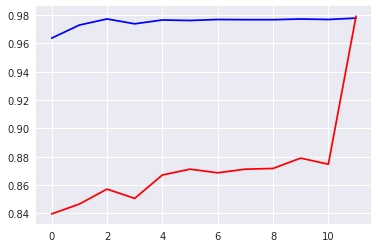

0.00429099728613


In [403]:
from sklearn.ensemble import RandomForestRegressor
import numpy as np
def rmsle(predicted, actual):
    assert(len(predicted) == len(actual))
    p = np.log(np.array(predicted) + 1)
    a = np.log(np.array(actual) + 1)
    return (((p - a)**2).sum() / len(predicted))**0.5

rf = RandomForestRegressor()
it = [200, 300, 400,500, 600, 700, 800, 900, 950,1000, 1022, 1455]
J1,J2 = [],[]
# alpha =[1,10,100,140,200,1000]
alpha = [100]
for al in alpha:
    print(al)
    J1,J2= [],[]
    for iteration in it:
        rf = RandomForestRegressor(n_estimators = 30, random_state = 0,min_samples_split=4,
                                 )
        rf.fit(train2.values[:iteration,:], SP.values[:iteration])
        print(iteration)
        score1 = rf.score(train2.values[:iteration,:], SP.values[:iteration])
        score2 = rf.score(x_test, y_test)
        J1.append(score1)
        J2.append(score2)
        print(1 - score1, 1 - score2)
    
    plt.plot(J1,'b-',label="J_train")
    plt.plot(J2,'r-',label="J_test")
    # plt.label()
    plt.show()
    y_pred1 = rf.predict(x_test)
    error = rmsle(y_pred1, y_test)
    print(error)
y_pred = rf.predict(test2.values)
y_pred[y_pred<0] = 0
sub1 = pd.DataFrame()
sub1['Id']=ID
sub1['SalePrice']=y_pred
sub1.to_csv("prediction_rf.csv",index=False)

#### 6. XGBoost

0.0303141187204 0.132233465569
0.0256337574026 0.103168937328
0.024151354124 0.0916908770831
0.0320885468204 0.0869229293394
0.0311772521674 0.0842929686356
0.0366113750704 0.0803021219738
0.0361050879946 0.0805131381213
0.0375437927115 0.0803171755073
0.0382844455357 0.0796893046091
0.0410015164676 0.0806172148585
0.0409832500004 0.0790802516062


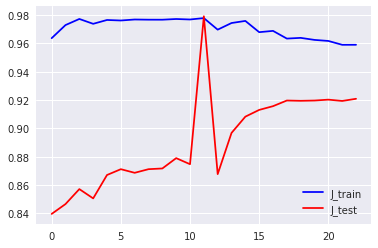

(1459,) (1459,)


In [404]:
from sklearn.model_selection import cross_val_score
from sklearn import ensemble
import xgboost as xgb
from sklearn import metrics
from sklearn.tree import DecisionTreeRegressor

#   colsample_bytree=0.2,
#                  gamma=0.0,
#                  learning_rate=0.68,
#                  max_depth=5,
#                  min_child_weight=1.5,
#                  n_estimators=7429,                                                                  
#                  reg_alpha=0.9,
#                  reg_lambda=0.6,
#                  subsample=0.2,
#                  seed=42,
#                  silent=1

##############################################
it = [200, 300, 400,500, 600, 700, 800, 900, 950,1000, 1022]
# it=[]
for iteration in it: 
#     xg = xgb.XGBRegressor(n_estimators = 1000,reg_alpha=0.9,reg_lambda=0.6)
    xg = ensemble.GradientBoostingRegressor(n_estimators=3000, learning_rate=0.01, max_depth=3, max_features='sqrt',
                                               min_samples_leaf=15, min_samples_split=10, loss='huber', random_state = 42)
#                  subsample=0.2,
#     xg = xgb.XGBRegressor(
#                  colsample_bytree=0.2,
#                  gamma=0.0,
#                  learning_rate=0.01,
#                  max_depth=4,
#                  min_child_weight=1.5,
#                  n_estimators=7200,                                                                  
#                  reg_alpha=0.9,
#                  reg_lambda=0.6,
#                  subsample=0.2,
#                  seed=42,
#                  silent=1)
    xg.fit(train2.values[:iteration,:], SP.values[:iteration])
#     y_pred1 = xg.predict(x_test)
    score1 = xg.score(train2.values[:iteration,:], SP.values[:iteration])
    score2 = xg.score(x_test, y_test)

    # print(rmsle(y_pred1, y_test))
#     y_pred2 = xg.predict(train1.values[:i,:])
#     print(xg.score(train1.values[:i,:],SP.values[:i]))
#     print(rmsle(y_pred2, SP.values[:i]))
#     y_pred1 = xg.predict(train1.values[:iteration,:])
#     score1 = rmsle(y_pred1, SP.values[:iteration])
#     y_pred1 = xg.predict(x_test)
#     score2 = rmsle(y_pred1, y_test)
    J1.append(score1)
    J2.append(score2)
    print(1 - score1, 1 - score2)

plt.plot(J1,'b-',label="J_train")
plt.plot(J2,'r-',label="J_test")
plt.legend()
plt.show()


#############################################
#  scoring = 'neg_mean_squared_log_error'
# scoring = 'neg_mean_absolute_error'
# accuracies = cross_val_score(xg, train1.values,  SP.values, cv = 10, scoring = 'r2')
# accuracies = -accuracies
# accuracies = (accuracies)**0.5
# print(accuracies)
# print(accuracies.mean())
# print(accuracies.std())

xg = ensemble.GradientBoostingRegressor(n_estimators=3500, learning_rate=0.01, max_depth=5, max_features='sqrt',
                                               min_samples_leaf=15, min_samples_split=10, loss='huber', random_state = 42)
xg.fit(train2.values, SP.values)
y_pred = xg.predict(test2.values)
y_pred[y_pred<0] = 0
y_pred = np.exp(y_pred)
y_pred1 = y_pred.copy()
y_pred = ((y_pred + y_pred_lasso + 0*y_pred_ridge))/2
sub1 = pd.DataFrame()
sub1['Id']=ID
sub1['SalePrice']=y_pred
sub1.to_csv("prediction_xg.csv",index=False)
print(y_pred_ridge.shape, y_pred.shape)

In [405]:
y_pred1 = pd.DataFrame(y_pred1)
y_pred_lasso1 = pd.DataFrame(y_pred_lasso)
y_pred_ridge1 = pd.DataFrame(y_pred_ridge)
display(y_pred1.head())
display(y_pred_lasso1.head())
display(y_pred_ridge1.head())
# print(y_pred1.describe())
print(y_pred1.values[((y_pred1 - y_pred_lasso1)>50000)])
print(y_pred_lasso1.values[((y_pred1 - y_pred_lasso1)>50000)])
print(y_pred_ridge1.values[((y_pred1 - y_pred_lasso1)>50000)])
print(type(y_pred1.values>100000))

0
0  126478.747031
1  156994.742504
2  186329.495536
3  194578.998225
4  178737.099437

0
0  107467.351054
1  166332.847910
2  180343.761998
3  197447.875961
4  187273.393122

0
0  105734.464201
1  167881.302194
2  180125.819358
3  197148.063579
4  187125.763773

[ 490074.09562896  454207.98823896  482461.38085313  540597.88152552]
[ 433533.44860982  382743.35104762  404531.68772744  474398.65102861]
[ 437848.0812976   385354.68542187  404937.84312108  480366.75967145]
<class 'numpy.ndarray'>


In [406]:
# from sklearn.model_selection import GridSearchCV
# parameters = [{'learning_rate':[0.1,0.01,0.001,0.03,0.0003,2,5,10,20,30,50,100],
#                'n_estimators':[3500]}]
# grid_search = GridSearchCV(estimator = xg, param_grid = parameters, scoring = 'r2', cv =10)
# grid_search.fit(train2.values, SP.values)
# best_accuracy = grid_search.best_score_
# best_parameters = grid_search.best_params_
# print(best_accuracy)
# print(best_parameters)

#####  K-Fold Validation

In [407]:
# from sklearn.model_selection import KFold
# from sklearn import ensemble
# kf = KFold(n_splits=10)
# kf.get_n_splits(train1) 

# for train_index, test_index in kf.split(train1):
#     print("TRAIN:", train_index,test_index)
#     X_train, X_test = train1.values[train_index], train1.values[test_index]
#     y_train, y_test = SP.values[train_index], SP.values[test_index]
# #     xg = xgb.XGBRegressor(
# #                  n_estimators= 1000,                                                                  
# #                  reg_alpha=0.9,
# #                  reg_lambda=0.6)
#     xg = ensemble.GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05, max_depth=3, max_features='sqrt',
#                                                min_samples_leaf=15, min_samples_split=10, loss='huber')
# #                  subsample=0.2,
# #                  seed=42,

    
#     lr.fit(X_train, y_train)
#     y_pred1 = lr.predict(X_test)
#     regr.fit(X_train, y_train)
#     y_pred1 = y_pred1 + regr.predict(X_test)
#     rdg.fit(X_train, y_train)
#     y_pred1 = y_pred1 + rdg.predict(X_test)
#     xg.fit(X_train, y_train)
#     y_pred1 =  xg.predict(X_test)
#     y_pred1 = y_pred1
#     print(rmsle(y_pred1, y_test))
   
# print(train1.index)
# pd.options.display.max_rows = 200
# temp1 = list(np.arange(580,724))
# temp2 = list(np.arange(0,580))
# temp3 = list(np.arange(724,1444))
# temp2 = temp2 + temp3
# # train1.drop(["MoSold"], axis = 1, inplace = True)
# X_train , X_test = train1.values[temp2], train1.values[temp1]
# y_train, y_test = SP.values[temp2], SP.values[temp1]

# lr.fit(X_train, y_train)
# y_pred1 = lr.predict(X_test)
# regr.fit(X_train, y_train)
# y_pred1 = y_pred1 + regr.predict(X_test)
# rdg.fit(X_train, y_train)
# y_pred1 = y_pred1 + rdg.predict(X_test)
# # rf.fit(X_train, y_train)
# # y_pred1 = y_pred1 + rf.predict(X_test)
# y_pred1 = y_pred1/3
# print(rmsle(y_pred1, y_test))
# temp = train1.iloc[temp1].copy()
# temp['Prediction'] = y_pred1
# temp['Real'] = SP.iloc[temp1]
# temp


In [408]:
np.arange(1,2)

array([1])

In [409]:
# train_temp = train1[580:724,:]
# test_temp = 

##### K-Fold Validation

In [410]:
accuracies = cross_val_score(regr, train2.values,  SP.values, cv = 10, scoring = 'r2')
# accuracies = -accuracies
# accuracies = (accuracies)**0.5
print(1- accuracies)
print(1- accuracies.mean())
print(accuracies.std(),"\n-----------------\n")

accuracies = cross_val_score(lr, train2.values,  SP.values, cv = 10, scoring = 'r2')
# accuracies = -accuracies
# accuracies = (accuracies)**0.5
print(1 - accuracies)
print(1 - accuracies.mean())
print(accuracies.std(),"\n-----------------\n")

accuracies = cross_val_score(rdg, train2.values,  SP.values, cv = 10, scoring = 'r2')
# accuracies = -accuracies
# accuracies = (accuracies)**0.5
print(1 - accuracies)
print(1 - accuracies.mean())
print(accuracies.std(),"\n-----------------\n")

accuracies = cross_val_score(rf, train2.values,  SP.values, cv = 10, scoring = 'r2')
# accuracies = -accuracies
# accuracies = (accuracies)**0.5
print(1 - accuracies)
print(1 - accuracies.mean())
print(accuracies.std(),"\n-----------------\n")

accuracies = cross_val_score(xg, train2.values,  SP.values, cv = 10, scoring = 'r2')
# accuracies = -accuracies
# accuracies = (accuracies)**0.5
print(1 - accuracies)
print(1 - accuracies.mean())
print(accuracies.std(),"\n-----------------\n")

[ 0.10661787  0.06444752  0.06365845  0.0806452   0.10608298  0.08659885
  0.09311057  0.07230185  0.07861653  0.09080118]
0.0842881007417
0.0145174716202 
-----------------

[ 0.0981064   0.06272616  0.06182483  0.07978479  0.09879615  0.08282673
  0.09103647  0.06893632  0.07538906  0.09059804]
0.0810024922675
0.0129831953995 
-----------------

[ 0.10633971  0.06441066  0.06365417  0.08054326  0.1059837   0.08655758
  0.09291296  0.07213137  0.07855405  0.0908011 ]
0.0841888560364
0.0144720186322 
-----------------

[ 0.13721277  0.09880755  0.1037025   0.10559083  0.13793272  0.1112452
  0.12022249  0.09433421  0.10840711  0.15888283]
0.117633820222
0.0196619554422 
-----------------

[ 0.08508594  0.05773711  0.05630834  0.09770228  0.10022285  0.07758773
  0.09031148  0.06827718  0.06255652  0.09169361]
0.0787483045822
0.0157481768246 
-----------------



## Stacking 

In [472]:
print(SP.shape, train2.shape, type(train2), type(test2))
print(type(SP))
print(test2.shape)

(1455,) (1455, 152) <class 'pandas.core.frame.DataFrame'> <class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
(1459, 152)


#### Lasso Prediction

In [473]:
from sklearn.model_selection import KFold
from sklearn import ensemble
kf = KFold(n_splits=5)
kf.get_n_splits(train1) 
Prediction_lasso1= np.zeros((SP.shape[0],))
Prediction_test1 = np.zeros((test.shape[0],))

for train_index, test_index in kf.split(train2):
#     print("TRAIN:", train_index,test_index)
    X_train, X_test = train2.values[train_index], train2.values[test_index]
    y_train, y_test = SP.values[train_index], SP.values[test_index]
    lr = Lasso(0.000092, max_iter= 1000000)
    lr.fit(X_train, y_train)
    print(1 - lr.score(X_test, y_test))
    Prediction_lasso1[test_index] = lr.predict(X_test)
    Prediction_test1 = Prediction_test1 + lr.predict(test2.values)
    
Prediction_test1 = Prediction_test1/5
from sklearn.metrics import r2_score
print("score: ", 1- r2_score(SP, Prediction_lasso1))
lr = Lasso(0.000092, max_iter= 1000000)
print((Prediction_lasso1.reshape(-1,1)).shape, Prediction_lasso1.shape)
lr.fit(Prediction_lasso1.reshape(-1,1), SP.values)
print("score: ", 1- r2_score(SP, lr.predict(Prediction_lasso1.reshape(-1,1))))
Prediction_test1 = lr.predict(Prediction_test1.reshape(-1,1))
print(Prediction_test1.shape, test2.shape)

sub2 = pd.DataFrame()
sub2['Id']=ID
Prediction_test1 = np.exp(Prediction_test1)
sub2['SalePrice'] = Prediction_test1
sub2.to_csv("prediction_stack_lasso.csv",index=False)

0.0812641387744
0.0744584741802
0.0938302086267
0.0814147578425
0.0879665668754
score:  0.0835015260165
(1455, 1) (1455,)
score:  0.0833490550526
(1459,) (1459, 152)


In [474]:
display(pd.DataFrame({'stacking':np.exp(Prediction_test1).tolist(),'xg_normal':y_pred1.values.tolist()}))
# pd.DataFrame(Prediction_test1)
# print(Prediction_test1.shape)

stacking             xg_normal
0          inf  [126478.74703109145]
1          inf  [156994.74250438687]
2          inf  [186329.49553562238]
3          inf   [194578.9982247958]
4          inf   [178737.0994373005]
5          inf   [177096.6762135248]
6          inf  [171456.87254902683]
7          inf   [167492.9867257807]
8          inf   [179119.2047062085]
9          inf   [128814.0177681169]
10         inf  [190244.27494254982]
11         inf   [94603.09839519109]
12         inf   [94844.49597693553]
13         inf  [148509.28076347196]
14         inf   [117929.6754757597]
15         inf  [368274.51212952076]
16         inf   [255518.9709615885]
17         inf   [292299.1259785809]
18         inf  [295475.58068303665]
19         inf    [526935.712548386]
20         inf  [332535.04964278074]
21         inf  [206400.14555220894]
22         inf    [176023.549695779]
23         inf  [168399.83109067805]
24         inf   [177171.8328265061]
25         inf   [195203.1799123682]
26         inf   [326939.6931283376]
27         inf  [226916.28350616753]
28         inf  [215267.66671225356]
29         inf  [224952.84343174225]
30         inf  [190720.17709312882]
31         inf   [96831.91308799104]
32         inf  [189065.13764721903]
33         inf  [291526.47096299066]
34         inf   [284330.3895550637]
35         inf  [243345.00376803617]
36         inf  [176665.96248249774]
37         inf   [161160.3631304148]
38         inf  [160096.05824868524]
39         inf  [160000.36944588102]
40         inf  [172876.44157808833]
41         inf  [154471.65008961537]
42         inf  [277065.14598178136]
43         inf   [241304.2026674088]
44         inf   [229467.0529605127]
45         inf   [179148.0780612228]
46         inf  [236570.86925309763]
47         inf  [190713.95100247732]
48         inf  [161031.89436534888]
49         inf  [150593.25151563386]
50         inf  [146955.92635191535]
51         inf  [164614.69444088388]
52         inf  [140325.48568065764]
53         inf     [150105.26154282]
54         inf  [179603.51517200551]
55         inf  [146238.45311150386]
56         inf  [160809.71952068608]
57         inf  [126012.89610590051]
58         inf  [224952.40082589444]
59         inf  [138028.77704193874]
60         inf  [138765.97794537843]
61         inf   [161642.1450833467]
62         inf  [114971.27066560354]
63         inf  [125209.94855691197]
64         inf  [126177.55172143286]
65         inf  [119231.57659259248]
66         inf   [108794.6108775711]
67         inf  [131157.99819412632]
68         inf   [148490.9329309893]
69         inf  [167079.62616433506]
70         inf  [110674.08706116363]
71         inf    [95030.0708750754]
72         inf  [146216.88962998087]
73         inf  [118292.49866063833]
74         inf   [153253.2575053445]
75         inf  [111446.99035477724]
76         inf   [69874.31607522331]
77         inf  [144116.64230361313]
78         inf  [180118.78885936024]
79         inf   [96094.24930342089]
80         inf  [139299.76617652175]
81         inf   [141622.9289286461]
82         inf   [215644.4872902088]
83         inf   [79205.86485870018]
84         inf  [106278.10845655731]
85         inf  [129029.39393827076]
86         inf  [134630.08845257864]
87         inf  [136328.68540060314]
88         inf  [115164.72237626388]
89         inf   [139224.5430437285]
90         inf  [106859.24320938364]
91         inf  [141913.91819885504]
92         inf  [144243.54809578756]
93         inf  [119013.49336549103]
94         inf   [178674.0195228934]
95         inf   [93793.94889869989]
96         inf  [104659.28337293839]
97         inf   [94074.21281041471]
98         inf   [95552.29421367841]
99         inf   [132813.4115264423]
100        inf  [132304.28492357902]
101        inf  [128679.46171422422]
102        inf  [122608.47283116727]
103        inf  [158048.40343674572]
104        inf  [152152.34224669894]
105        inf  [244265.45231422066]
106        inf    [72628.9515445584]
107       

In [475]:
from sklearn.model_selection import KFold
from sklearn import ensemble
kf = KFold(n_splits=5)
kf.get_n_splits(train1) 
Prediction_xg1= np.zeros((SP.shape[0],))
Prediction_test2 = np.zeros((test.shape[0],))

for train_index, test_index in kf.split(train2):
#     print("TRAIN:", train_index,test_index)
    X_train, X_test = train2.values[train_index], train2.values[test_index]
    y_train, y_test = SP.values[train_index], SP.values[test_index]
    xg = ensemble.GradientBoostingRegressor(n_estimators=3000, learning_rate=0.01, max_depth=3, max_features='sqrt',
                                               min_samples_leaf=15, min_samples_split=10, loss='huber', random_state = 42) 
    xg.fit(X_train, y_train)
    print(1 - xg.score(X_test, y_test))
    Prediction_xg1[test_index] = xg.predict(X_test)
    Prediction_test2 = Prediction_test2 + xg.predict(test2.values)
    
Prediction_test2 = Prediction_test2/5
from sklearn.metrics import r2_score
xg = ensemble.GradientBoostingRegressor(n_estimators=3000, learning_rate=0.01, max_depth=3, max_features='sqrt',
                                               min_samples_leaf=15, min_samples_split=10, loss='huber', random_state = 42)
print((Prediction_xg1.reshape(-1,1)).shape, Prediction_xg1.shape)
xg.fit(Prediction_xg1.reshape(-1,1), SP.values)
print("score: ", 1- r2_score(SP, xg.predict(Prediction_xg1.reshape(-1,1))))
Prediction_test2 = xg.predict(Prediction_test2.reshape(-1,1))
print(Prediction_test2.shape, test2.shape)                                        
sub3 = pd.DataFrame()
sub3['Id']=ID
Prediction_test2 = np.exp(Prediction_test2)
sub3['SalePrice'] = Prediction_test2
sub3.to_csv("prediction_stack_xg.csv",index=False)

Prediction_test = (Prediction_test1 + Prediction_test2)/2
sub4 = pd.DataFrame()
sub4['Id']=ID
sub4['SalePrice'] = Prediction_test
sub4.to_csv("prediction_stack.csv",index=False)

0.0729097721465
0.078509073692
0.0878147232946
0.0775761460339
0.0802479537309
(1455, 1) (1455,)
score:  0.0692392981361
(1459,) (1459, 152)


In [476]:
display(sub2.head(), sub3.head(), sub4.head())

Id      SalePrice
0  1461  107985.486834
1  1462  166475.369167
2  1463  180933.184963
3  1464  196973.916997
4  1465  186841.956696

Id      SalePrice
0  1461  123410.672119
1  1462  155477.875383
2  1463  187809.308226
3  1464  192569.707240
4  1465  181641.977729

Id      SalePrice
0  1461  115698.079477
1  1462  160976.622275
2  1463  184371.246594
3  1464  194771.812118
4  1465  184241.967212